In [2]:
!pip install python-chess

  Using cached python_chess-1.999-py3-none-any.whl.metadata (776 bytes)
  Using cached chess-1.10.0-py3-none-any.whl.metadata (19 kB)
Using cached python_chess-1.999-py3-none-any.whl (1.4 kB)
Using cached chess-1.10.0-py3-none-any.whl (154 kB)


In [1]:
import chess
import random

board = chess.Board('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - ')

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


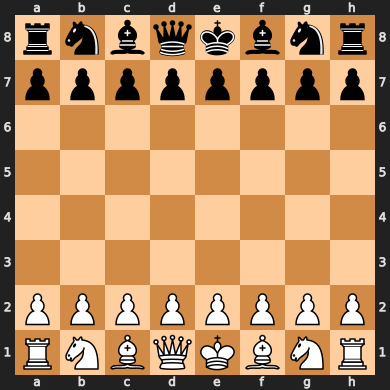

In [2]:
print(board)
board

In [3]:
for move in board.legal_moves:
    print(move)

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


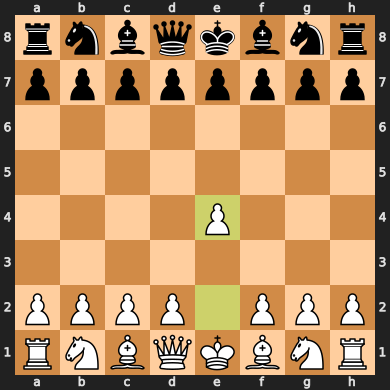

In [4]:
board.push_san('e2e4')
board

In [5]:
for move in board.legal_moves:
    print(move)

g8h6
g8f6
b8c6
b8a6
h7h6
g7g6
f7f6
e7e6
d7d6
c7c6
b7b6
a7a6
h7h5
g7g5
f7f5
e7e5
d7d5
c7c5
b7b5
a7a5


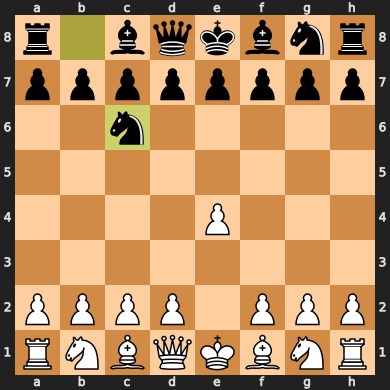

In [6]:
board.push_san('b8c6')
board

In [7]:
print(board.outcome())

None


In [8]:
board.fen()

'r1bqkbnr/pppppppp/2n5/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 1 2'

In [9]:
board.push_san('f1c4')

Move.from_uci('f1c4')

In [10]:
board.push_san('e7e5')

Move.from_uci('e7e5')

In [11]:
board.push_san('d1f3')

Move.from_uci('d1f3')

In [12]:
board.push_san('d7d6')

Move.from_uci('d7d6')

In [13]:
board.push_san('f3f7')

Move.from_uci('f3f7')

In [14]:
print(board.outcome())

Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)


In [15]:
board.fen()

'r1bqkbnr/ppp2Qpp/2np4/4p3/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 0 4'

In [16]:
def play_random(fen):
    
    board = chess.Board(fen=fen)
    
    move = random.choice(list(board.legal_moves))
    
    return str(move)

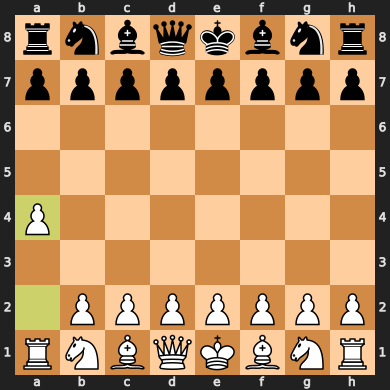

In [17]:
board = chess.Board()
board_fen = board.fen()
board.push_san(play_random(board_fen))
board

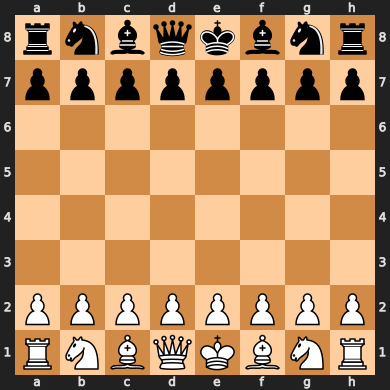

Your move:  e2e4


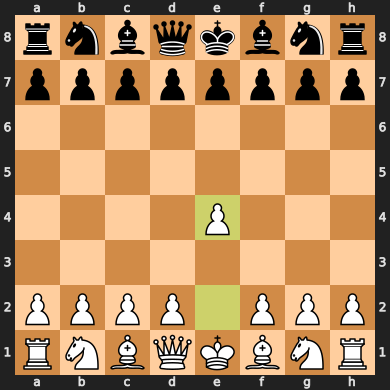

AI move: e7e6


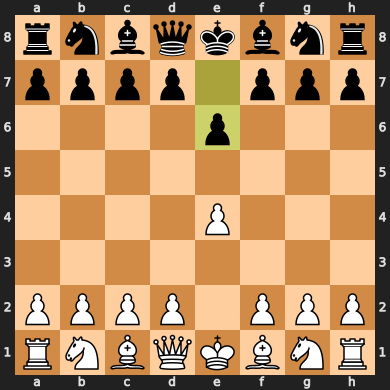

KeyboardInterrupt: Interrupted by user

In [19]:
from IPython.display import SVG, display

def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        display(SVG(board._repr_svg_()))

        if board.turn == chess.WHITE:
            user_move = input('Your move: ')
            if user_move == 'quit':
                break
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasn\'t a valid move. Please enter a legal move ')
                user_move = input('Your move: ')
            board.push_san(user_move)

        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())
        
play_game(play_random)

In [21]:
import numpy as np
def encoding_piece(piece):
    pieces=list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p : i for i, p in enumerate (pieces)}
    index = piece_to_index[piece]
    arr [index] = 1

    return arr

encoding_piece('b')

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
def encode_board(board):

    board_str = str(board)

    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(encoding_piece(piece))
        board_list.append(row_list)
    return np.array(board_list)

encode_board(chess.Board())

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

    

In [23]:
import pandas as pd 
train_df = pd.read_csv("C:/Users/Lenovo/Desktop/Artificial Intelligence/Chess_AI_Bot/train-an-ai-to-play-chess/train.csv")
val_df = train_df[-1000:]
train_df.head()

id                                              board  black_score  \
0  80091               6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118          0.0   
1  18578  r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...       -131.0   
2  11580  r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...       -490.0   
3  72805                  8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85       -574.0   
4  74310                 8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90          0.0   

  best_move  
0      g8d8  
1      f3e5  
2      g6f7  
3      h6h5  
4      e5e6

In [24]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

X_train = np.stack(train_df['board'].apply(encode_fen_string))
y_train = train_df['black_score']


X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

In [26]:
modell = model.fit(
X_train,
y_train,
epochs=50,
validation_data=(X_val, y_val))

Epoch 1/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 152483.8750 - val_loss: 129192.8750
Epoch 2/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 123177.0547 - val_loss: 117401.0938
Epoch 3/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 116972.3906 - val_loss: 110632.2344
Epoch 4/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 109358.0625 - val_loss: 104002.2109
Epoch 5/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 104553.4141 - val_loss: 100743.9453
Epoch 6/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 105847.0000 - val_loss: 100279.8750
Epoch 7/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 99500.1250 - val_loss: 92916.6094
Epoch 8/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 100914.1406 - val_loss: 89295.1719
Epoch 9/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 91182.1719 - val_loss: 85715.6562
Epoch 10/50
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 91571.6797 - val_loss: 83887.5078
Epoch 11/50
18

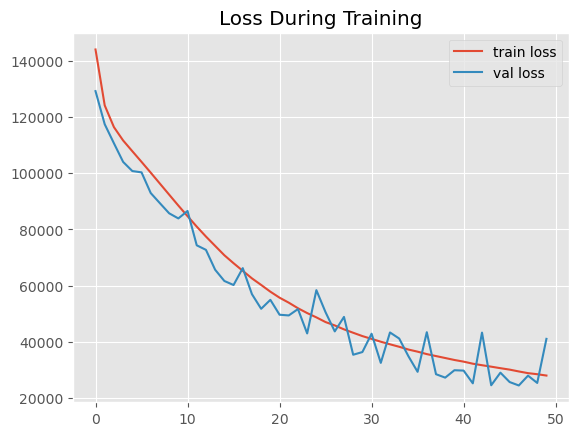

In [27]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(modell.history['loss'], label='train loss')
plt.plot(modell.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

In [44]:
import chess

def minimax(board, depth, alpha, beta, is_maximizing):
    if depth == 0 or board.is_game_over():
        return evaluate_board(board)

    legal_moves = list(board.legal_moves)

    if is_maximizing:
        max_eval = -float('inf')
        for move in legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, False)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break  
        return max_eval
    else:
        min_eval = float('inf')
        for move in legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, True)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break  
        return min_eval

def evaluate_board(board):
    if board.is_checkmate():
        if board.turn:
            return -9999  
        else:
            return 9999  
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        return 0  

    material = 0
    piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}

    for piece_type in piece_values:
        material += len(board.pieces(piece_type, chess.WHITE)) * piece_values[piece_type]
        material -= len(board.pieces(piece_type, chess.BLACK)) * piece_values[piece_type]

    return material

def find_best_move(board, depth):
    best_move = None
    best_value = -float('inf') if board.turn else float('inf')
    
    for move in board.legal_moves:
        board.push(move)
        board_value = minimax(board, depth - 1, -float('inf'), float('inf'), not board.turn)
        board.pop()

        if board.turn and board_value > best_value:
            best_value = board_value
            best_move = move
        elif not board.turn and board_value < best_value:
            best_value = board_value
            best_move = move

    return best_move

depth = 3 
board = chess.Board() 

best_move = find_best_move(board, depth)
board.push(best_move) 
print(best_move)


g1h3


In [45]:
def play_nn(fen, show_move_evaluations=False, player='b', use_minimax=False, depth=3):
    board = chess.Board(fen=fen)
    
    if use_minimax:
        best_move = find_best_move(board, depth)
        if show_move_evaluations:
            print(f'Best move using Minimax: {best_move}')
        return str(best_move)

    moves = []
    for move in board.legal_moves:
        candidate_board = board.copy()
        candidate_board.push(move)
        
        input_vector = encode_board(str(candidate_board)).astype(np.int32)
        input_vector = input_vector.reshape((1, 8, 8, 13))
        
        score = model.predict(input_vector, verbose=0)[0][0]
        moves.append((score, move))
        
        if show_move_evaluations:
            print(f'{move}: {score}')
    
    best_move = sorted(moves, reverse=player=='b')[0][1]
    
    return str(best_move)


In [46]:
starting_board = chess.Board()
play_nn(starting_board.fen())

'f2f3'

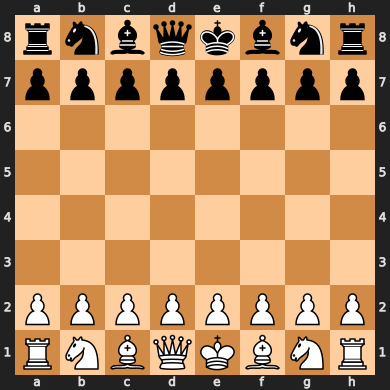

Your move:  e2e4


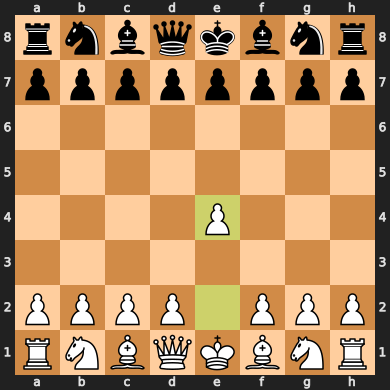

AI move: g8f6


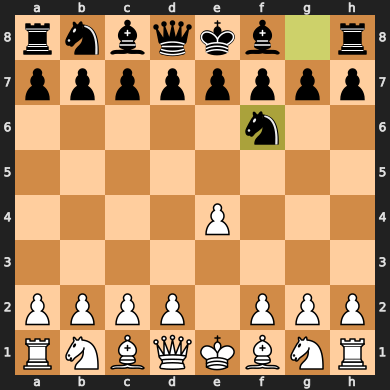

Your move:  b1c3


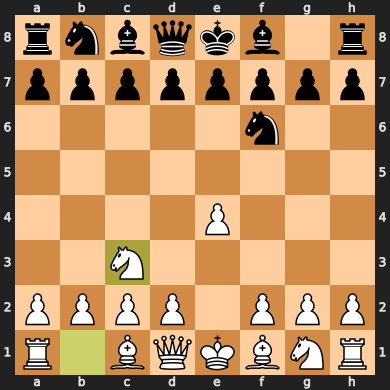

AI move: h7h6


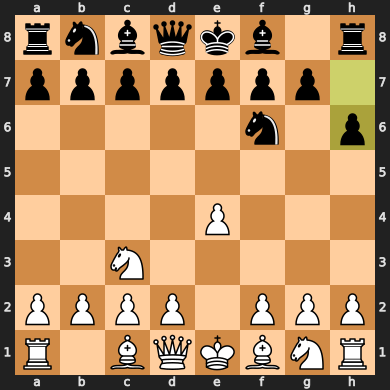

Your move:  g1f3


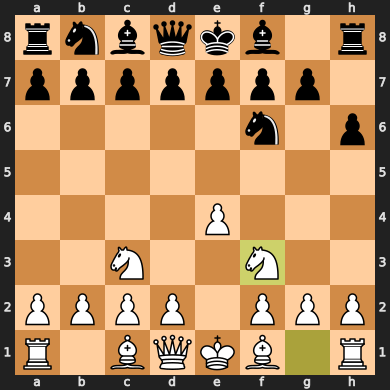

AI move: e7e6


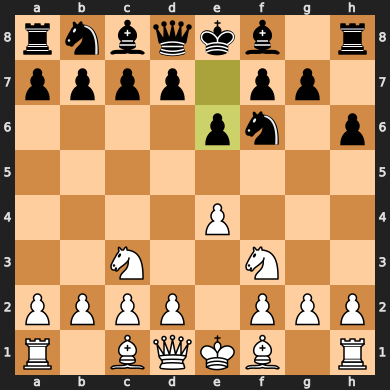

Your move:  f1c4


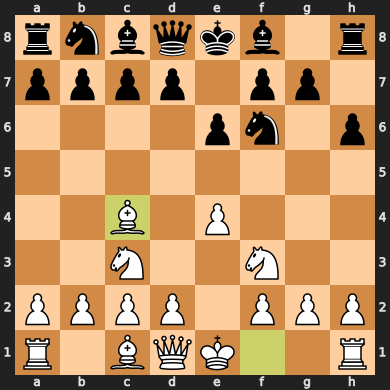

AI move: d7d5


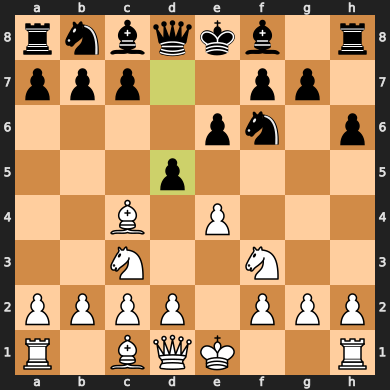

Your move:  c


That wasn't a valid move. Please enter a legal move 


Your move:  c4b3


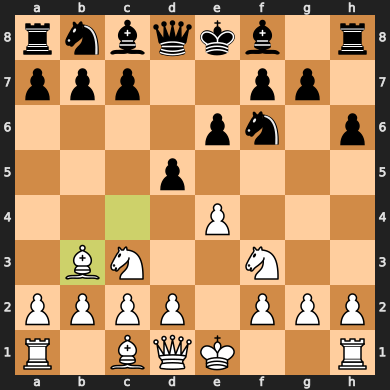

AI move: d5e4


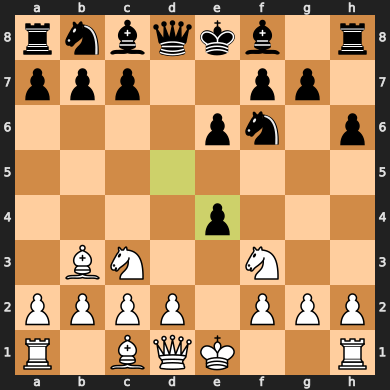

Your move:  c3e4


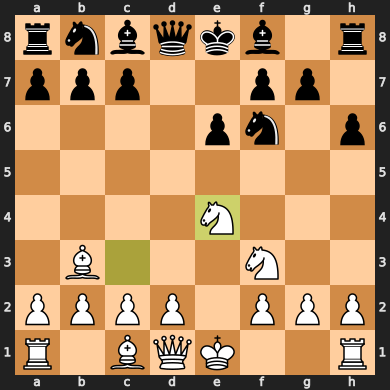

AI move: d8e7


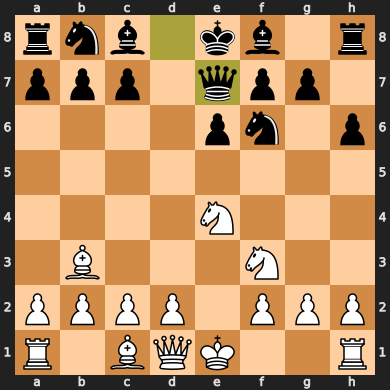

Your move:  d2d4


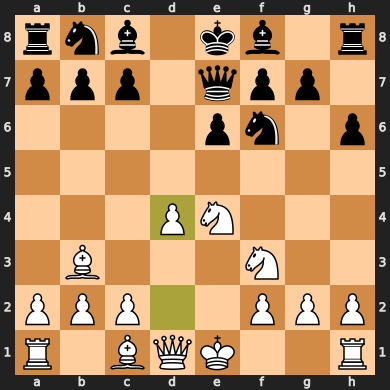

AI move: c7c5


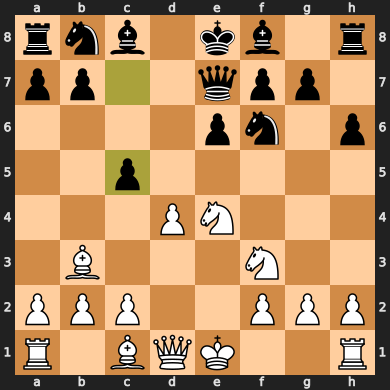

Your move:  e4c5


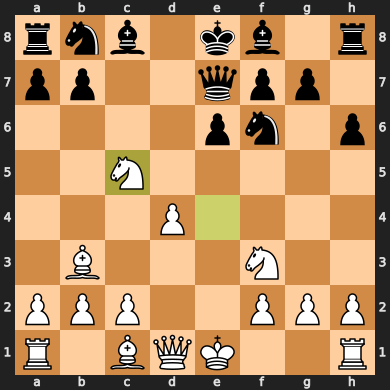

AI move: a7a5


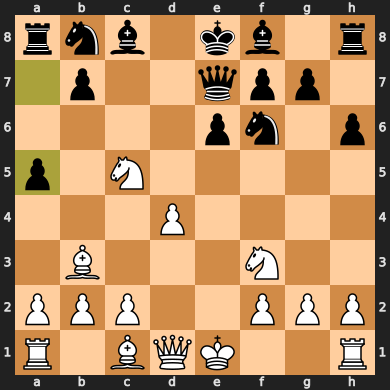

Your move:  b3a


That wasn't a valid move. Please enter a legal move 


Your move:  b3a4


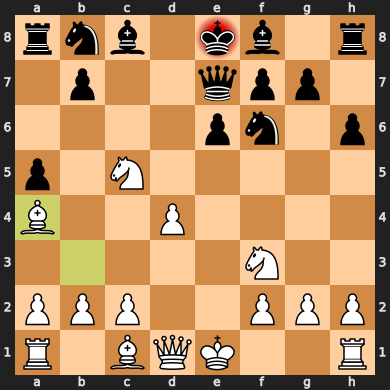

AI move: b8d7


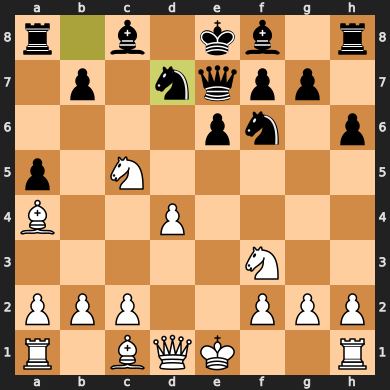

Your move:  e1g1


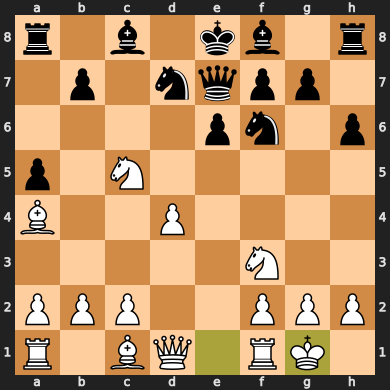

AI move: e7d8


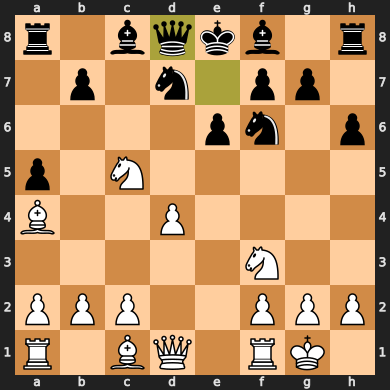

KeyboardInterrupt: Interrupted by user

In [47]:
play_game(play_nn)

In [50]:
pip install python-chess stockfish

In [31]:
def calculate_elo(old_rating, opponent_rating, result, k_factor=32):
    expected_score = 1 / (1 + 10 ** ((opponent_rating - old_rating) / 400))
    new_rating = old_rating + k_factor * (result - expected_score)
    return new_rating

In [40]:
def simulate_game(ai_function, stockfish_elo, bot_rating):
    board = chess.Board()

    stockfish_path = "C:/Users/Lenovo/Downloads/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe"
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    
    engine.configure({"UCI_LimitStrength": True, "UCI_Elo": max(stockfish_elo, 1320)})

    while not board.is_game_over():
        if board.turn == chess.WHITE:
            stockfish_move = engine.play(board, chess.engine.Limit(time=0.1))
            board.push(stockfish_move.move)
        else:
            ai_move = ai_function(board.fen(), player='b')  
            board.push_san(ai_move)
    
    engine.quit()
    
    result = board.result()
    if result == "1-0":  
        return 0  
    elif result == "0-1":  
        return 1
    else:  
        return 0.5 

In [41]:
def rate_bot(ai_function, initial_rating=1500, stockfish_elos=[1320, 1360 , 1400, 1600, 1800], num_games=5):
    bot_rating = initial_rating

    for stockfish_elo in stockfish_elos:
        print(f"Playing against Stockfish with ELO {stockfish_elo}...")
        for i in range(num_games):
            result = simulate_game(ai_function, stockfish_elo, bot_rating)
            print(f"Game {i+1} result: {'Win' if result == 1 else 'Loss' if result == 0 else 'Draw'}")
            bot_rating = calculate_elo(bot_rating, stockfish_elo, result)
            print(f"Updated bot rating: {bot_rating}")
    
    return bot_rating

In [42]:
import chess.engine

final_bot_rating = rate_bot(play_nn, initial_rating=1500)
print(f"Final bot rating: {final_bot_rating}")

Playing against Stockfish with ELO 1320...
Game 1 result: Loss
Updated bot rating: 1476.3805109587065
Game 2 result: Loss
Updated bot rating: 1453.6288210428852
Game 3 result: Loss
Updated bot rating: 1431.761487974033
Game 4 result: Loss
Updated bot rating: 1410.7851510339012
Game 5 result: Loss
Updated bot rating: 1390.6969639999475
Playing against Stockfish with ELO 1360...
Game 1 result: Loss
Updated bot rating: 1373.2869835428255
Game 2 result: Loss
Updated bot rating: 1356.6753934649043
Game 3 result: Loss
Updated bot rating: 1340.8284925810224
Game 4 result: Loss
Updated bot rating: 1325.7104781393712
Game 5 result: Loss
Updated bot rating: 1311.2844619116563
Playing against Stockfish with ELO 1400...
Game 1 result: Loss
Updated bot rating: 1299.2834273815602
Game 2 result: Loss
Updated bot rating: 1287.7958996064363
Game 3 result: Loss
Updated bot rating: 1276.7906405632327
Game 4 result: Loss
Updated bot rating: 1266.2381744843378
Game 5 result: Loss
Updated bot rating: 1256.1

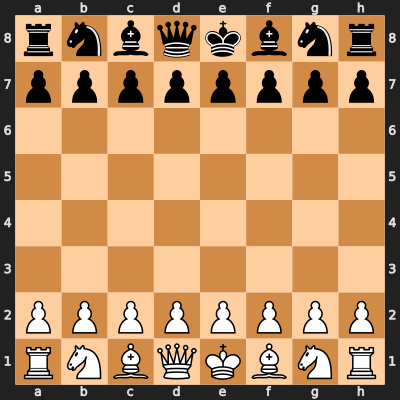

Stockfish (White) move: d2d4


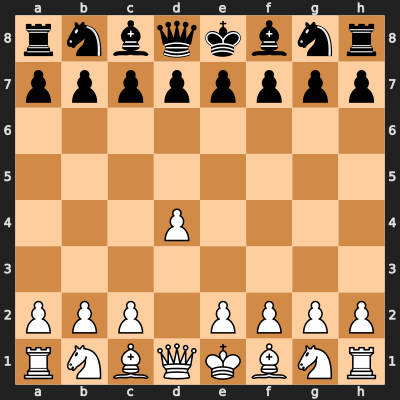

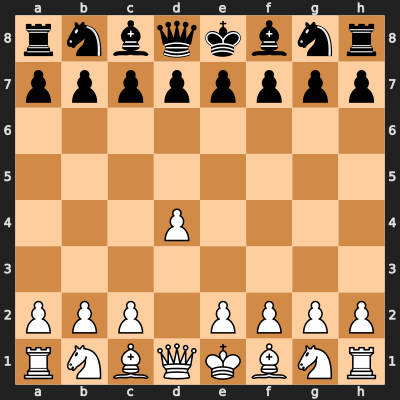

AI (Black) move: e7e5


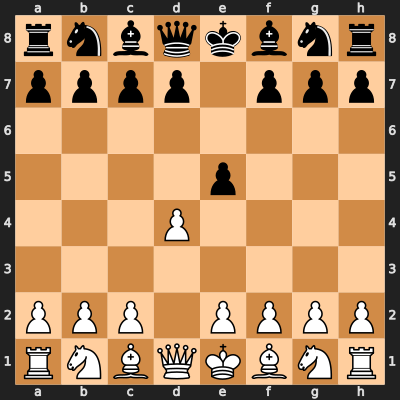

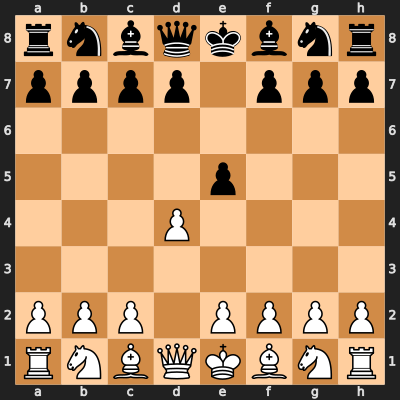

Stockfish (White) move: d4e5


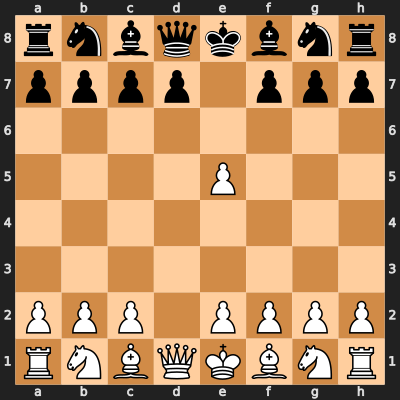

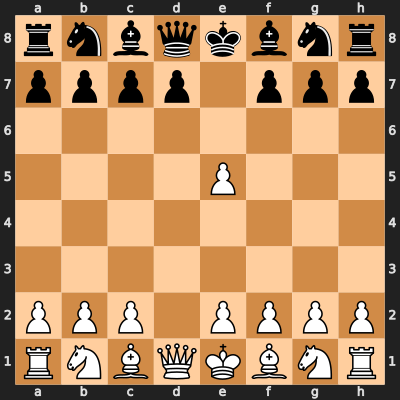

AI (Black) move: d8e7


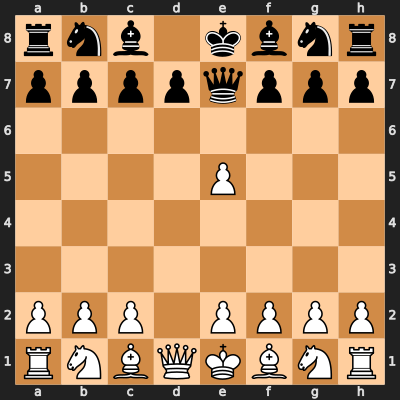

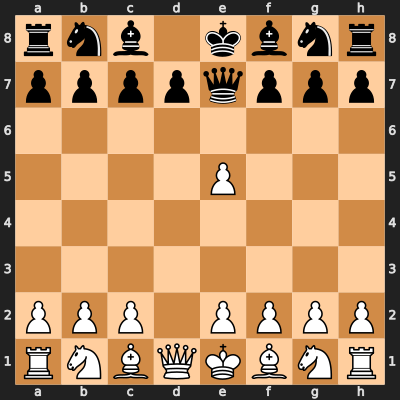

Stockfish (White) move: f2f4


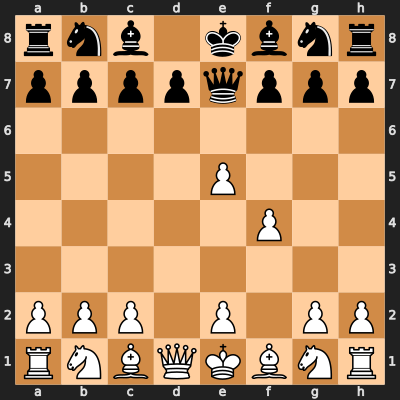

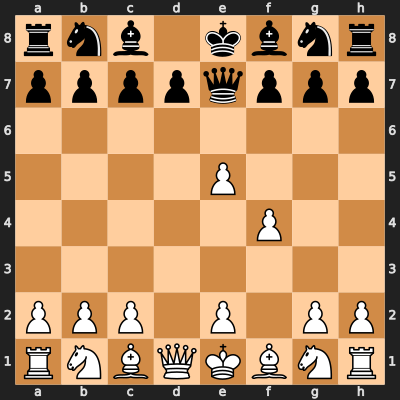

AI (Black) move: b8c6


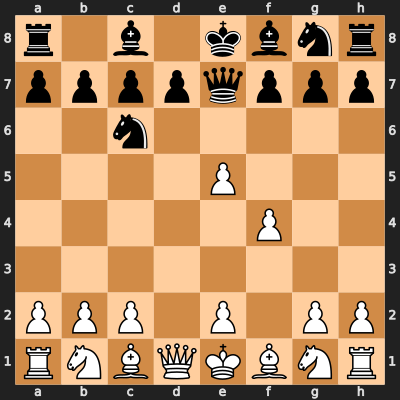

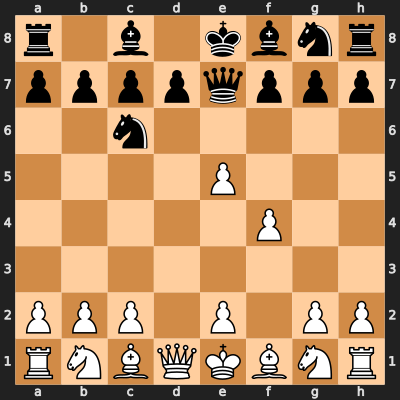

Stockfish (White) move: b1c3


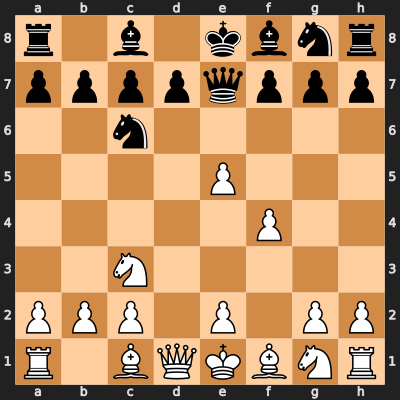

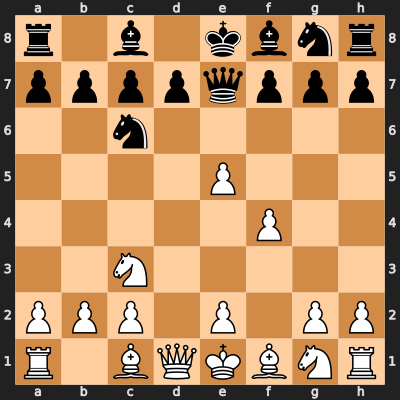

AI (Black) move: d7d6


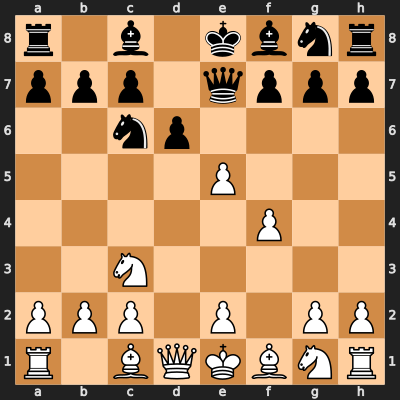

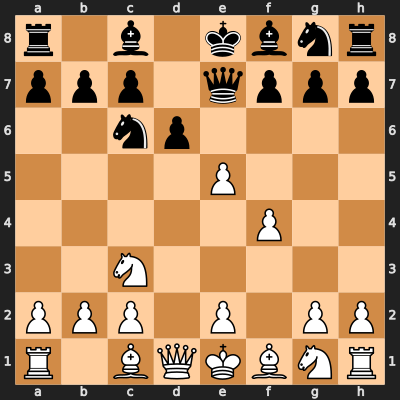

Stockfish (White) move: g1f3


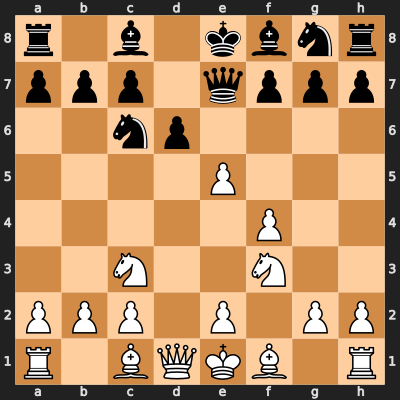

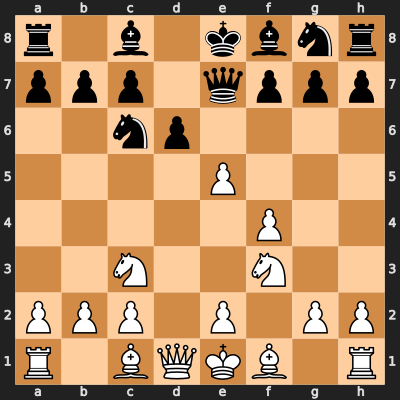

AI (Black) move: d6e5


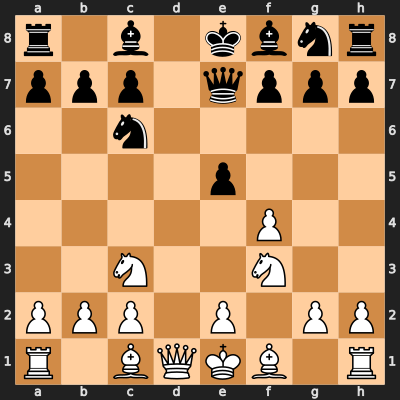

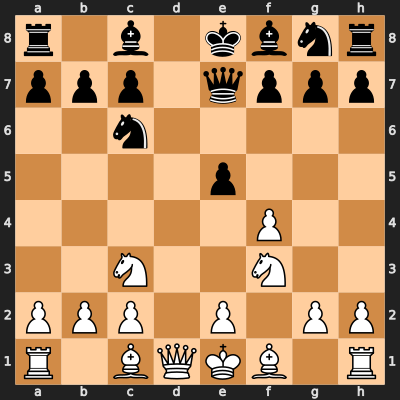

Stockfish (White) move: c3d5


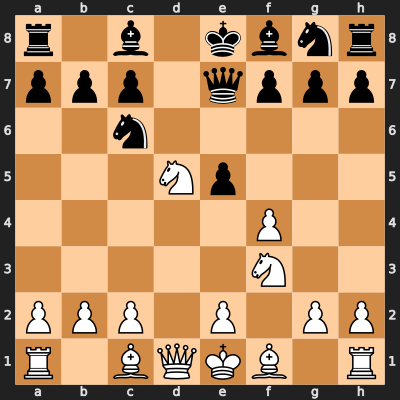

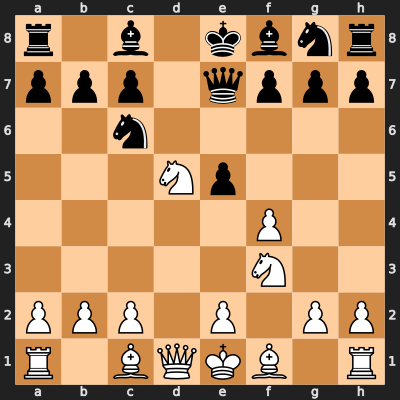

AI (Black) move: e7d6


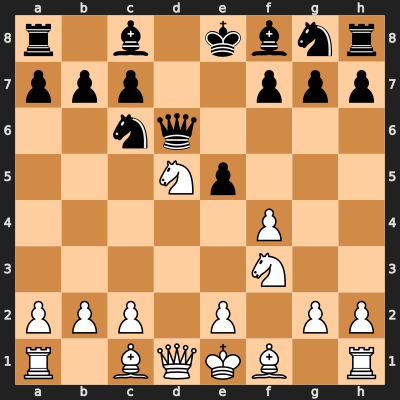

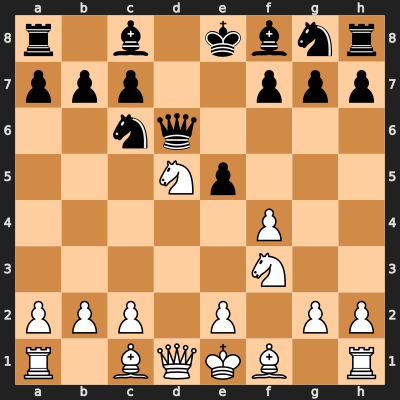

Stockfish (White) move: f4e5


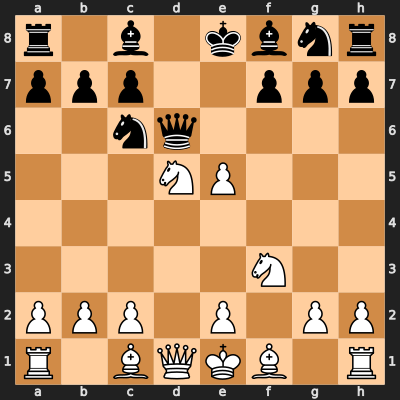

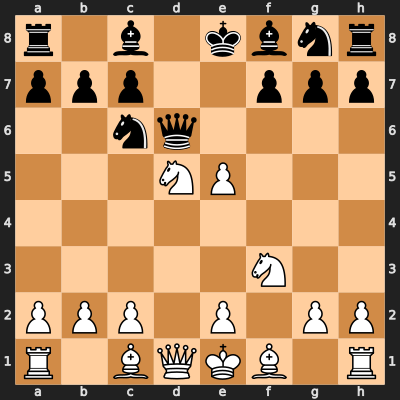

AI (Black) move: g8f6


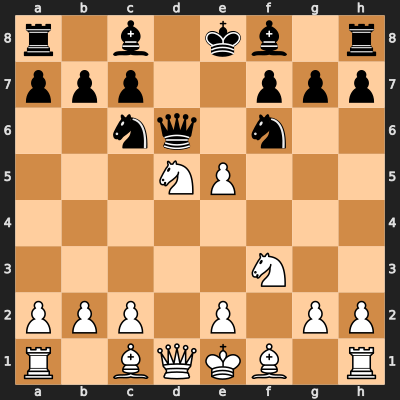

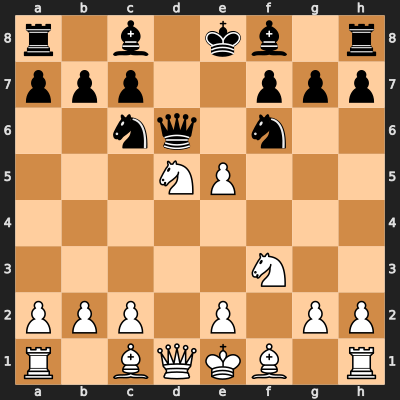

Stockfish (White) move: c2c4


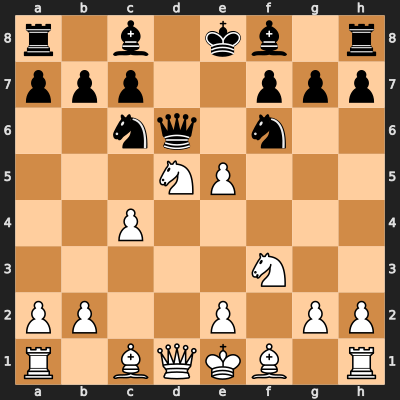

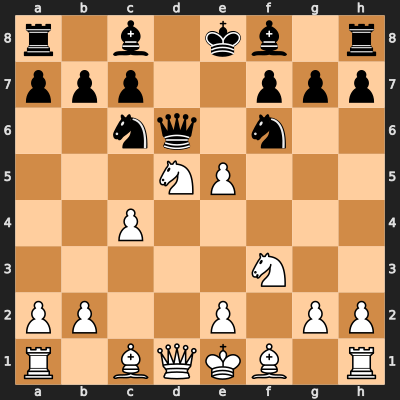

AI (Black) move: c8d7


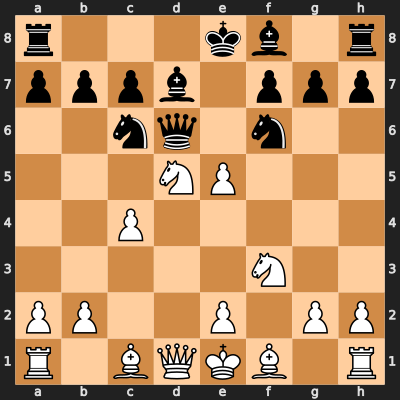

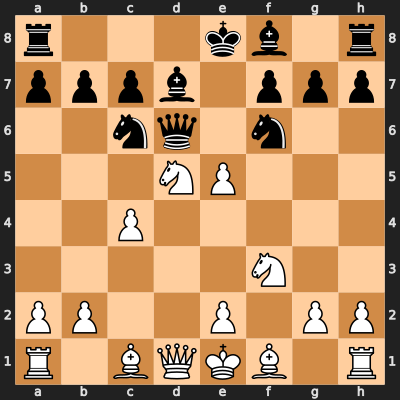

Stockfish (White) move: e5d6


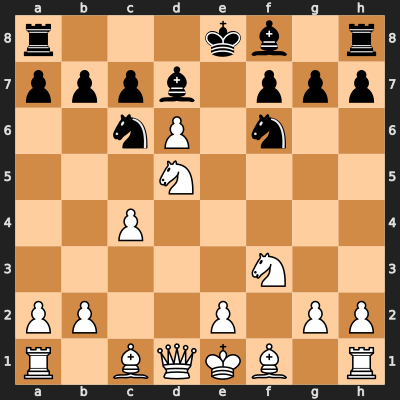

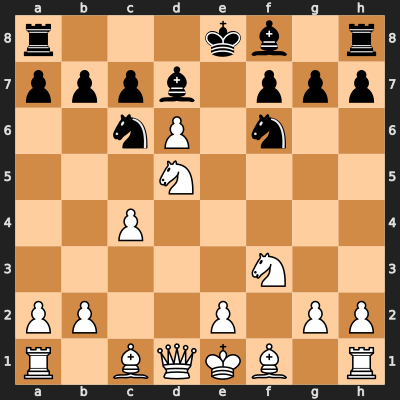

AI (Black) move: e8c8


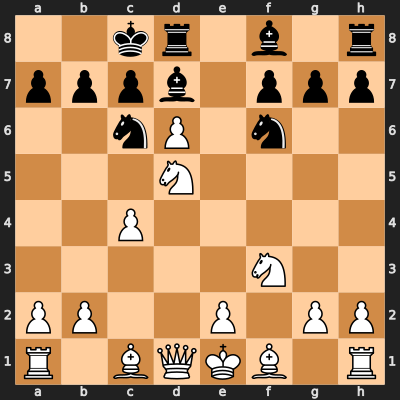

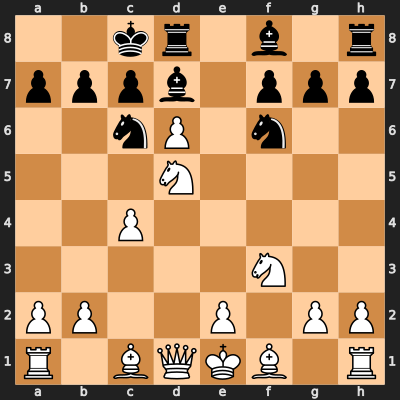

Stockfish (White) move: d5f6


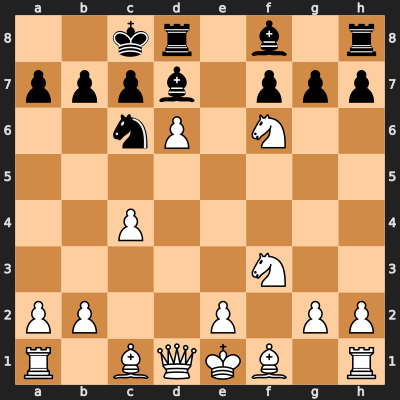

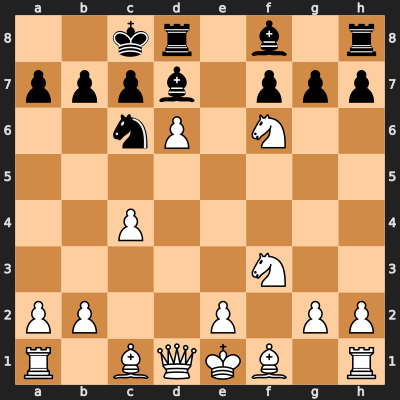

AI (Black) move: d7g4


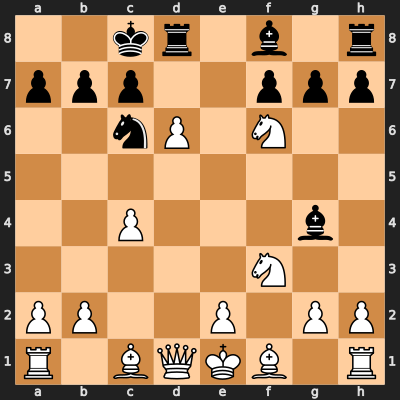

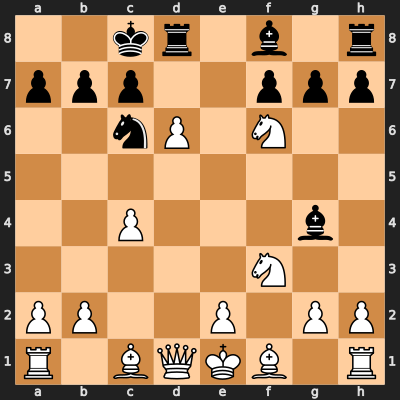

Stockfish (White) move: g2g3


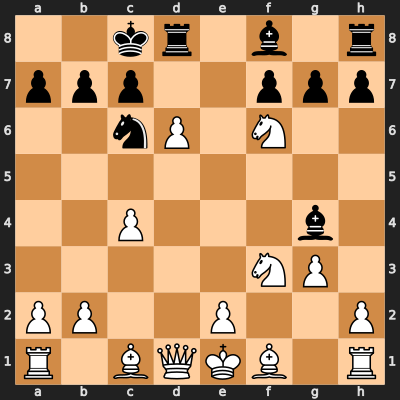

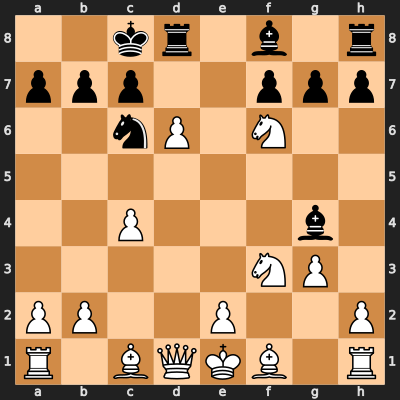

AI (Black) move: f8d6


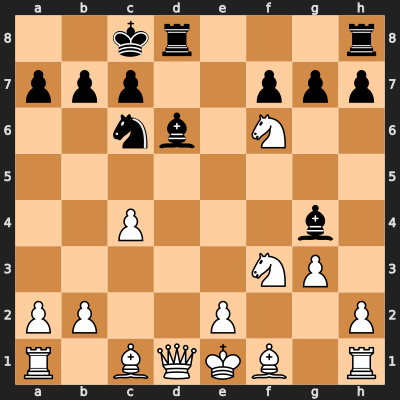

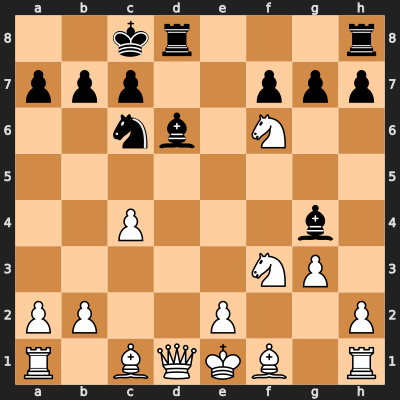

Stockfish (White) move: f6g4


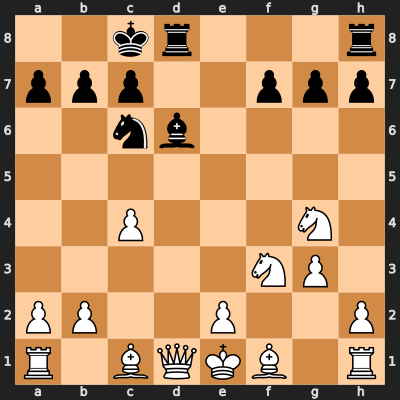

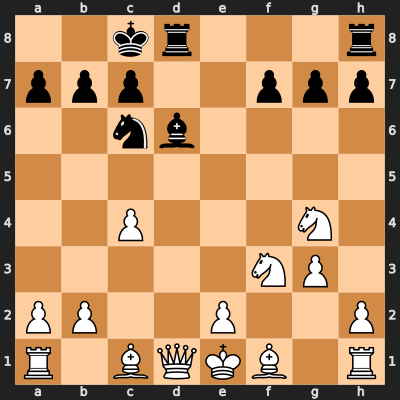

AI (Black) move: a7a6


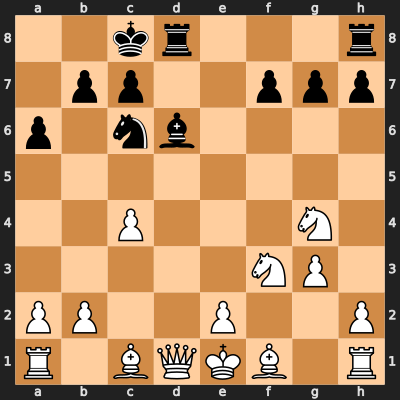

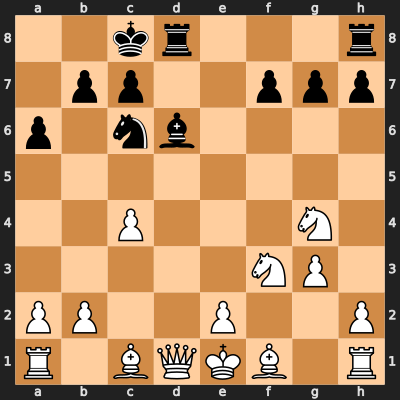

Stockfish (White) move: f1h3


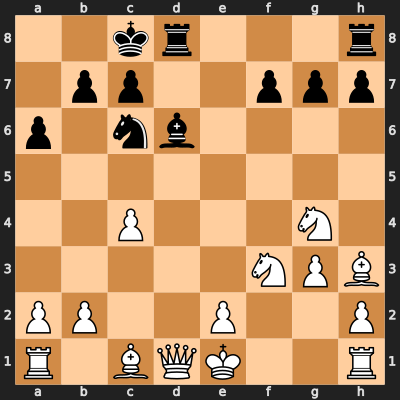

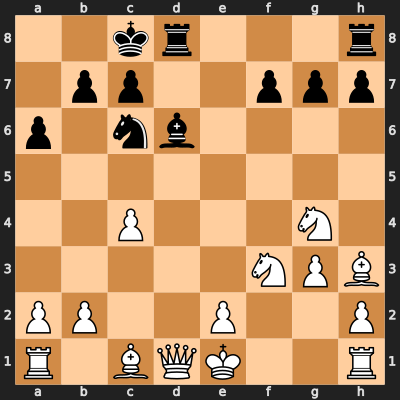

AI (Black) move: h7h6


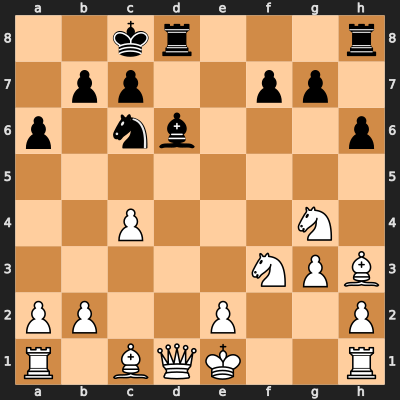

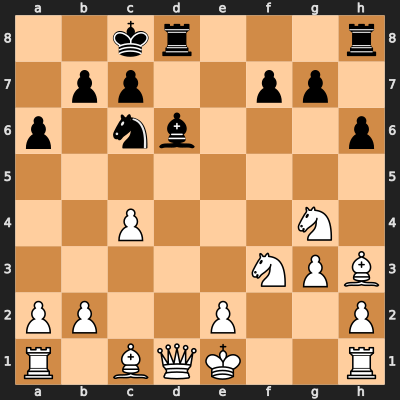

Stockfish (White) move: c1d2


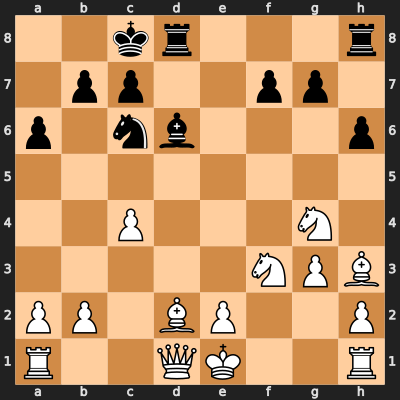

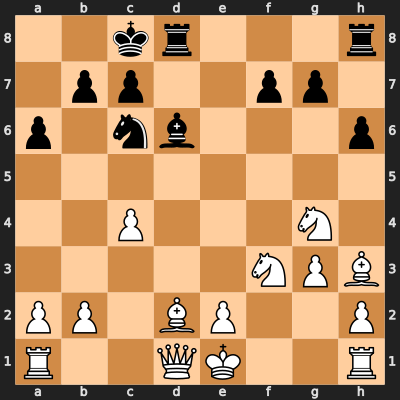

AI (Black) move: c6a5


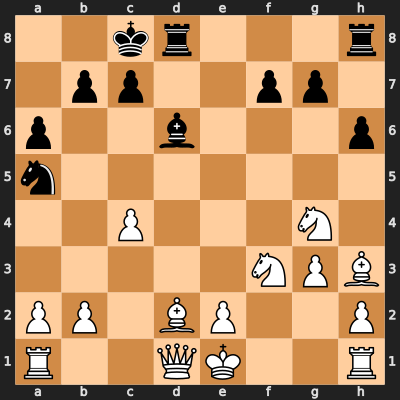

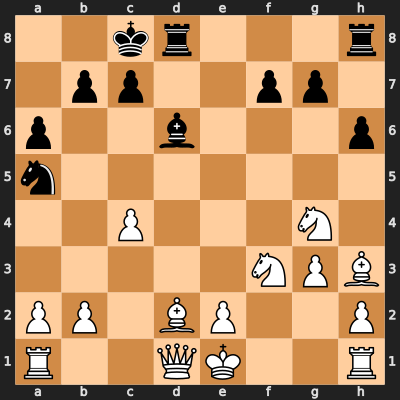

Stockfish (White) move: d2a5


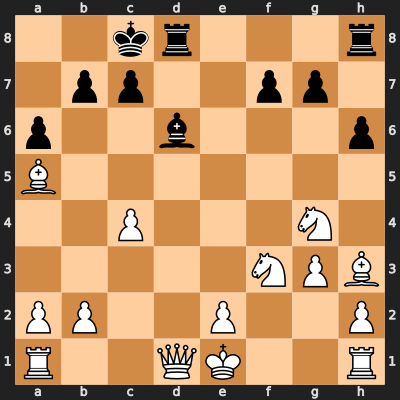

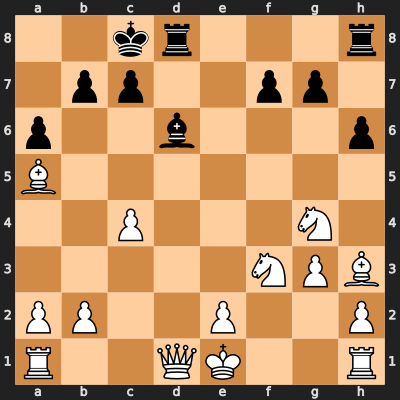

AI (Black) move: h8e8


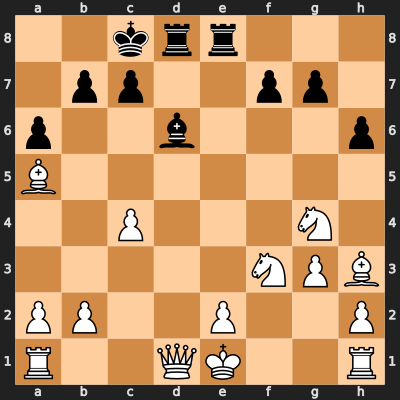

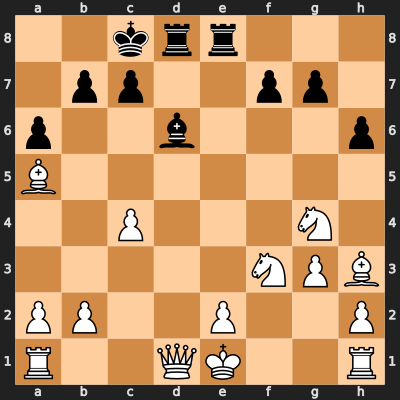

Stockfish (White) move: g4f2


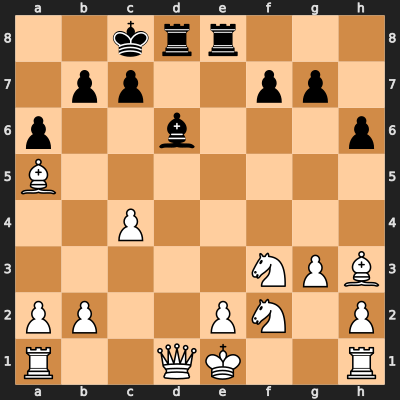

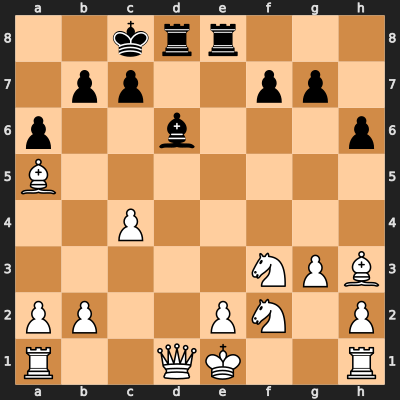

AI (Black) move: c8b8


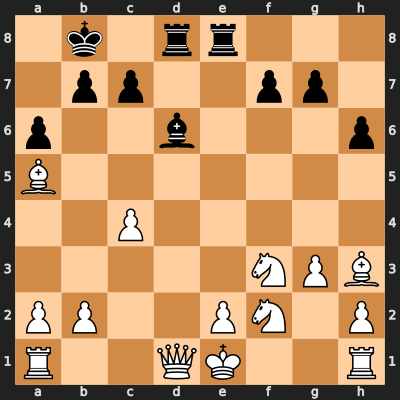

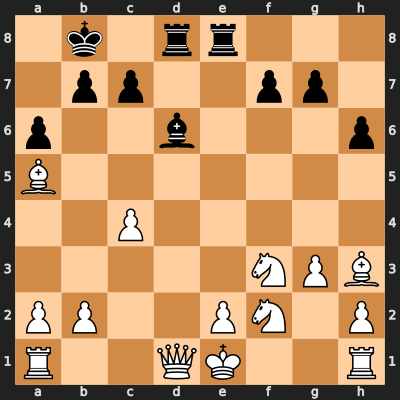

Stockfish (White) move: a5d2


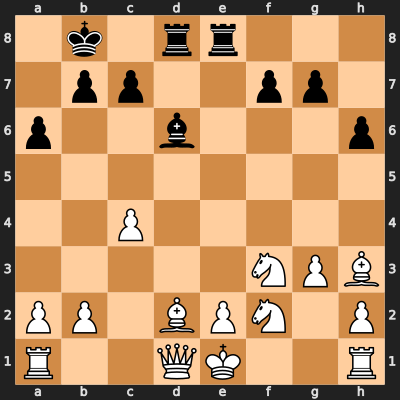

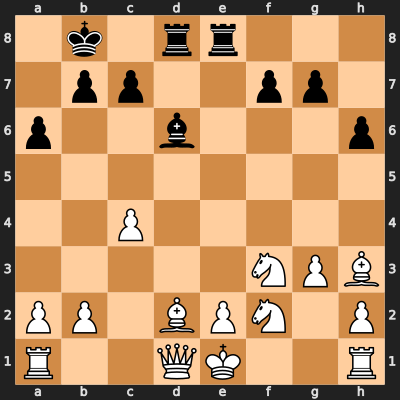

AI (Black) move: a6a5


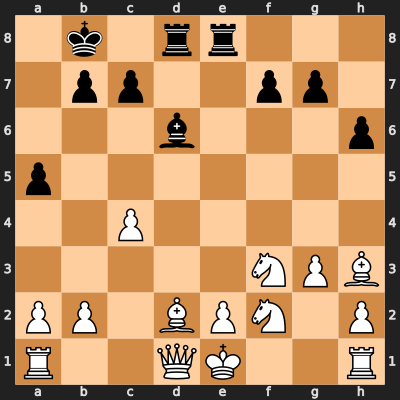

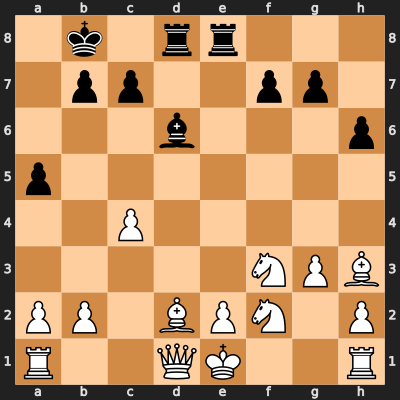

Stockfish (White) move: f2d3


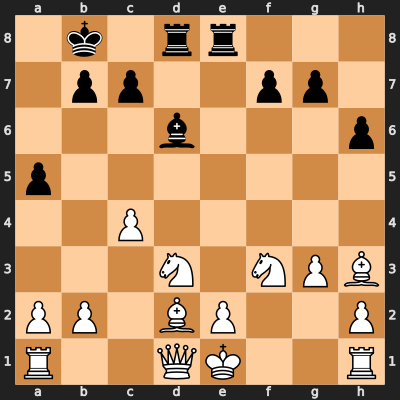

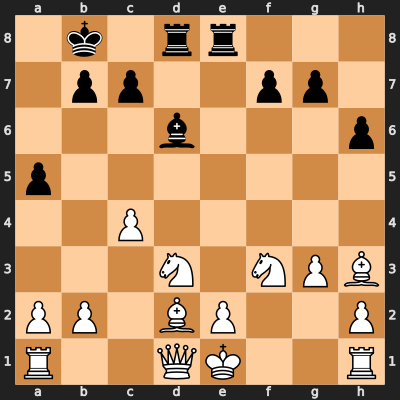

AI (Black) move: e8e7


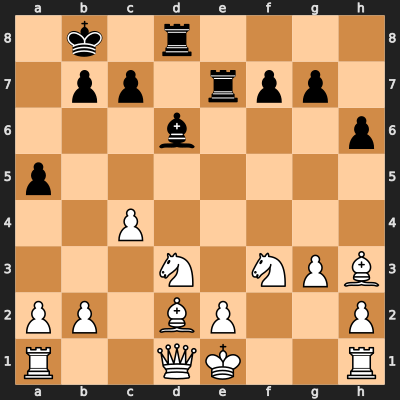

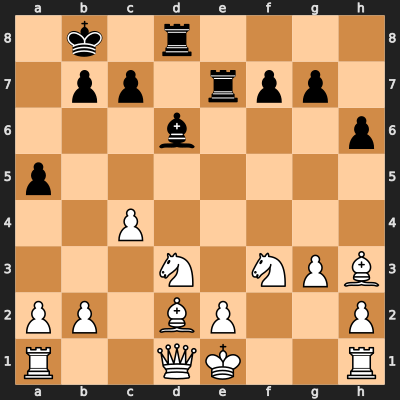

Stockfish (White) move: a2a3


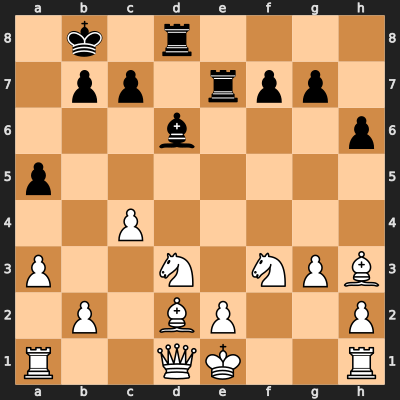

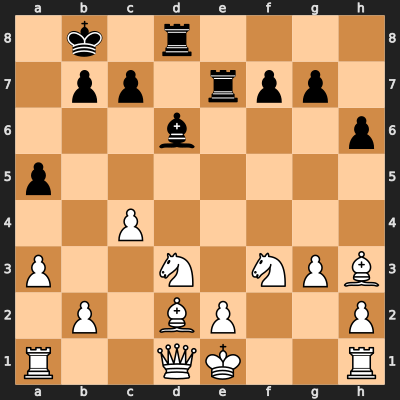

AI (Black) move: e7e8


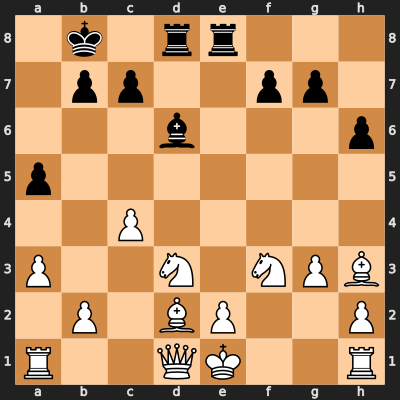

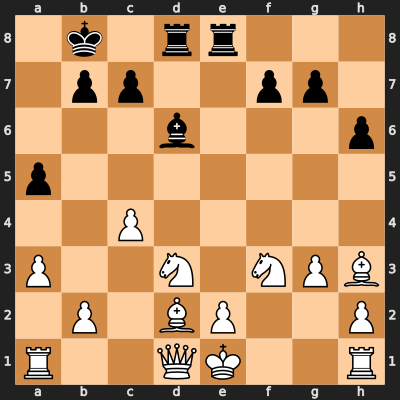

Stockfish (White) move: d3f2


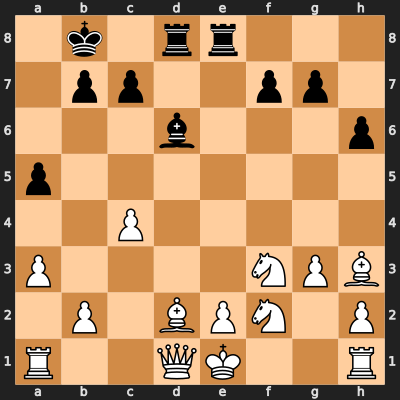

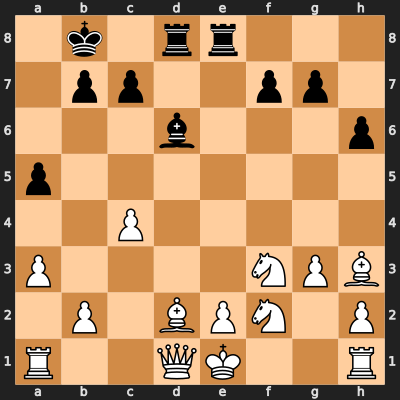

AI (Black) move: e8e7


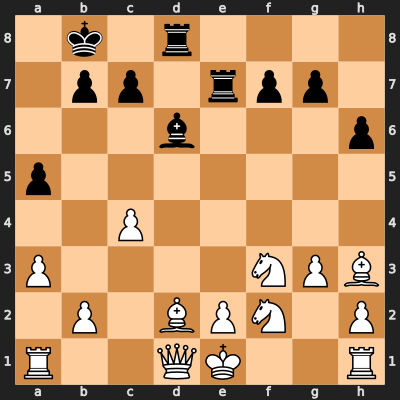

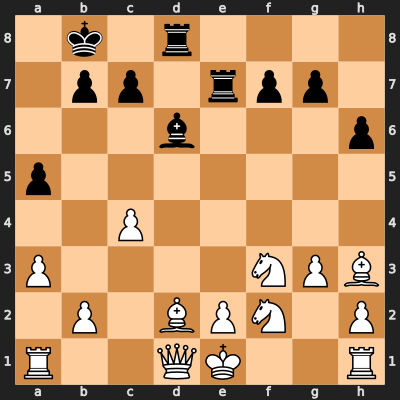

Stockfish (White) move: a1b1


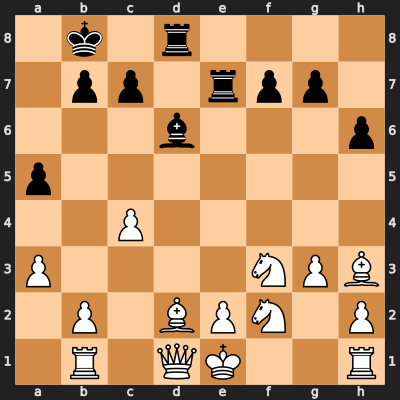

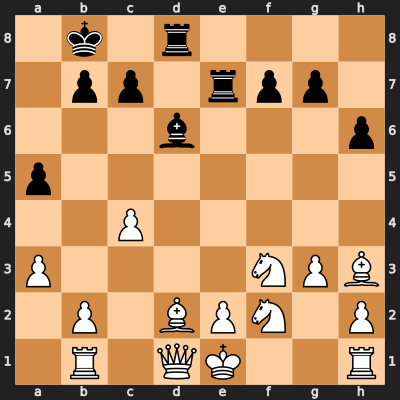

AI (Black) move: e7e8


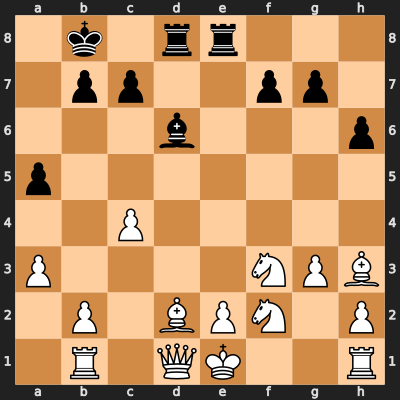

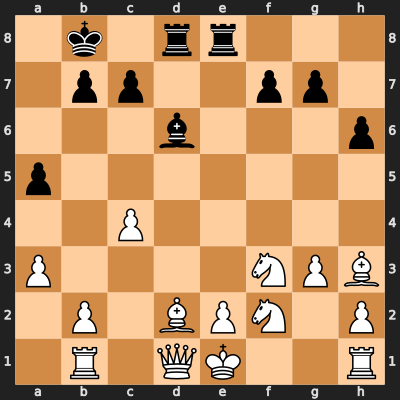

Stockfish (White) move: h1f1


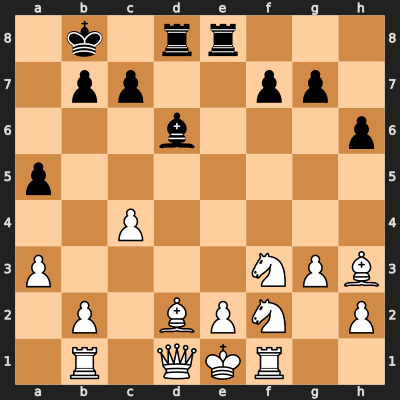

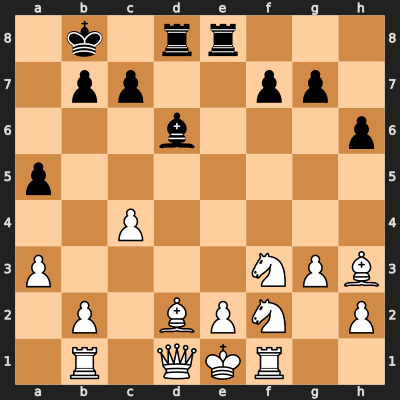

AI (Black) move: e8e7


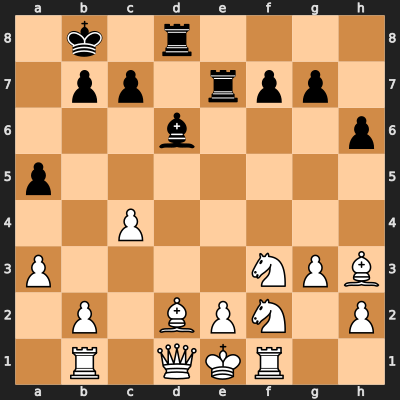

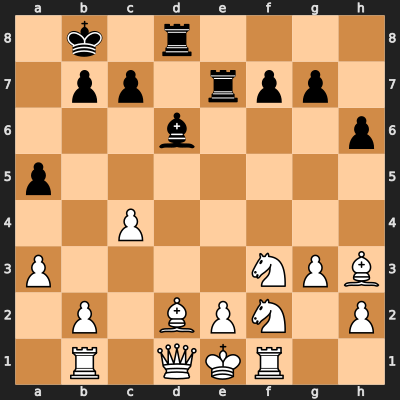

Stockfish (White) move: e2e4


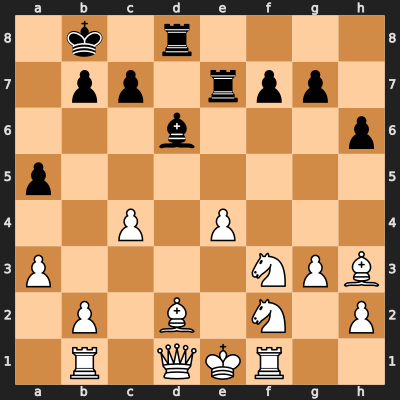

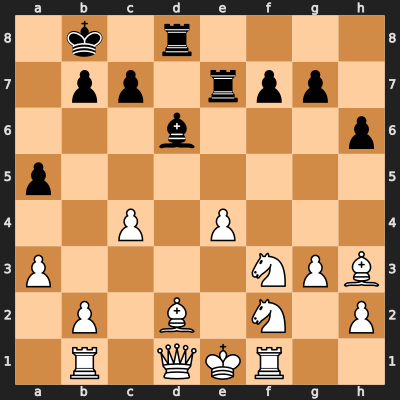

AI (Black) move: e7e8


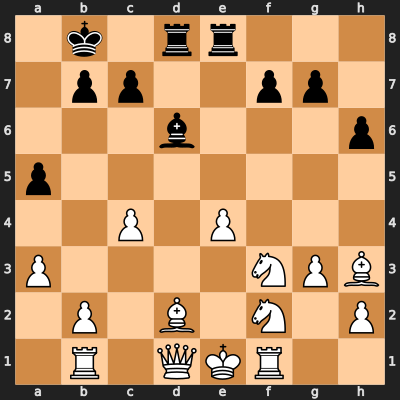

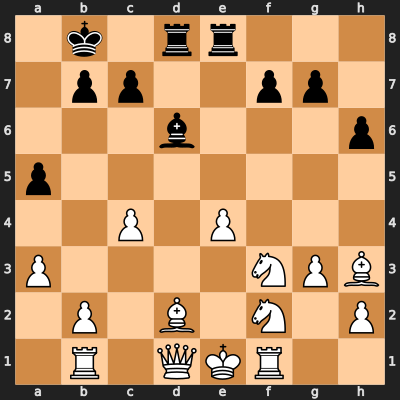

Stockfish (White) move: d2f4


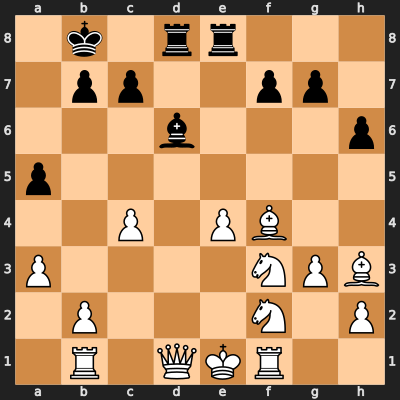

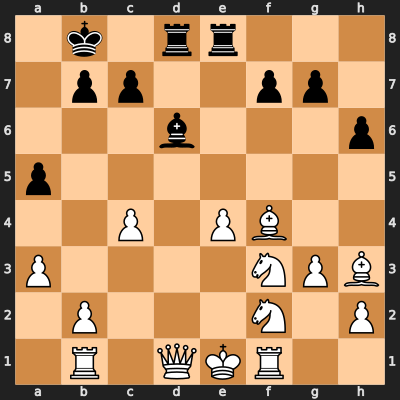

AI (Black) move: d6f4


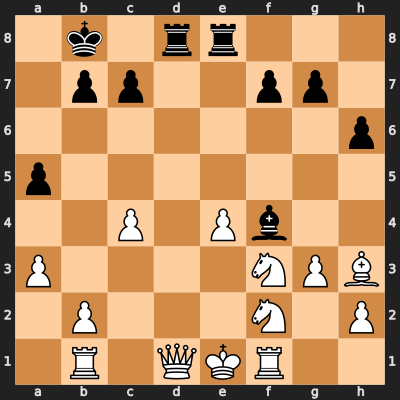

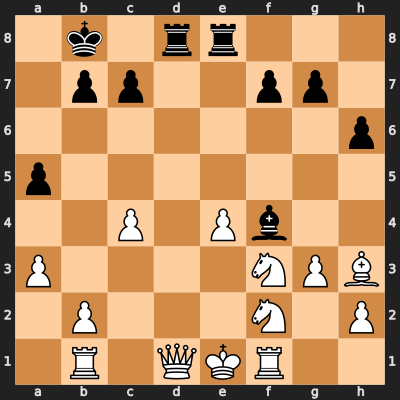

Stockfish (White) move: d1b3


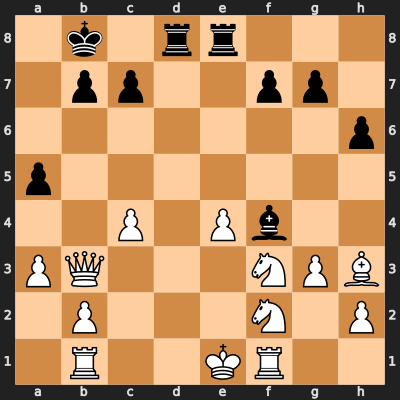

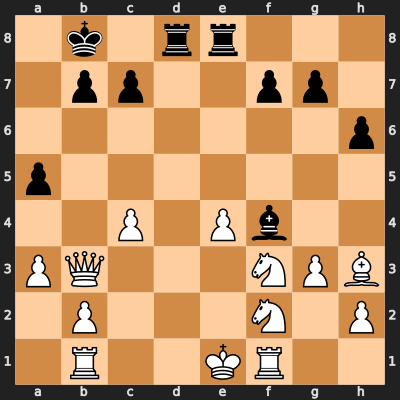

AI (Black) move: f4d2


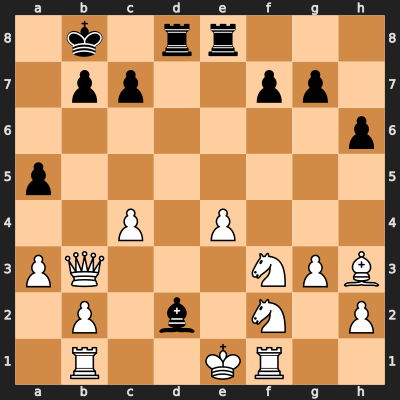

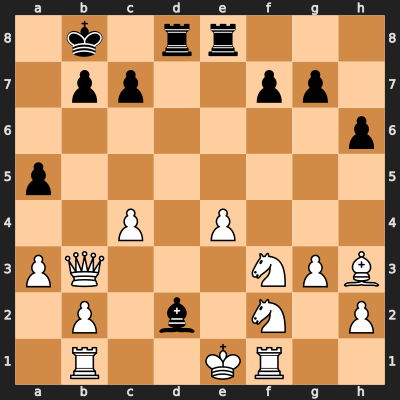

Stockfish (White) move: e1e2


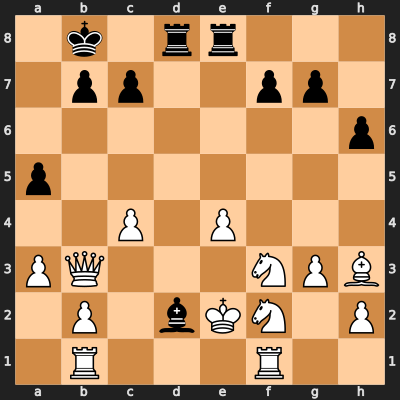

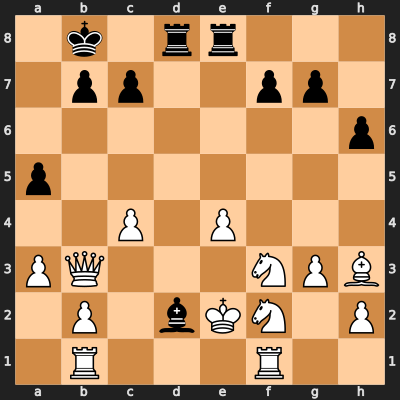

AI (Black) move: d2g5


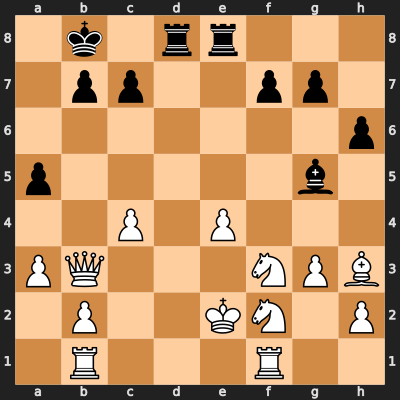

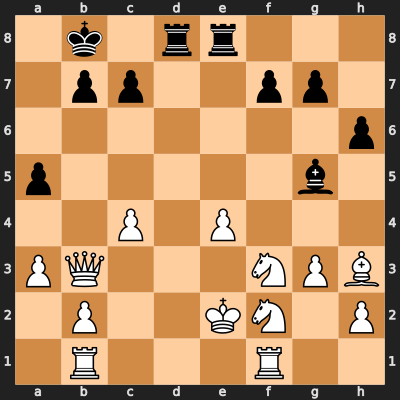

Stockfish (White) move: f1d1


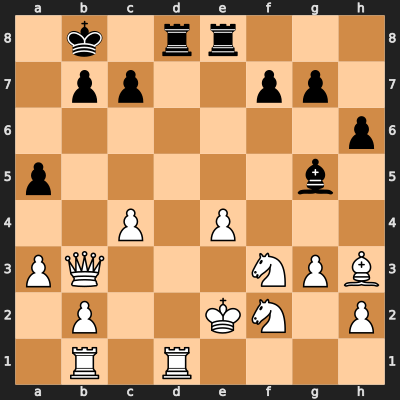

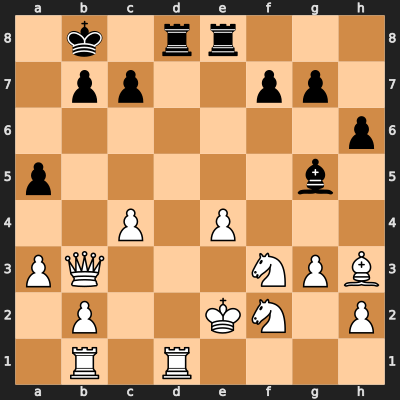

AI (Black) move: g5f6


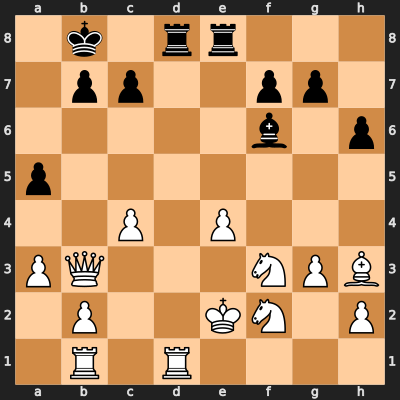

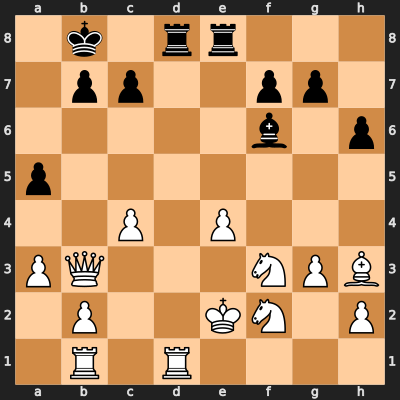

Stockfish (White) move: h3d7


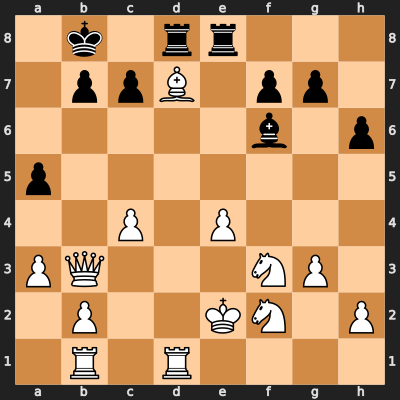

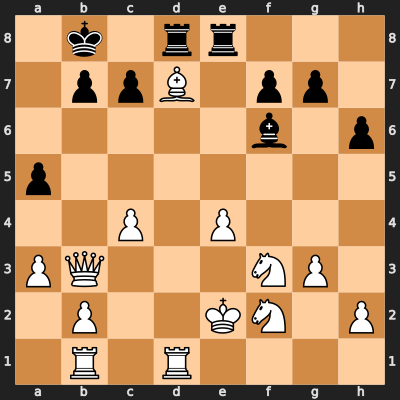

AI (Black) move: d8d7


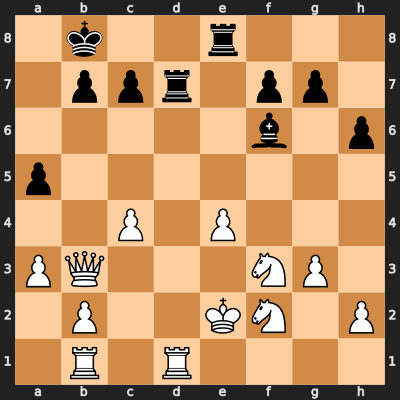

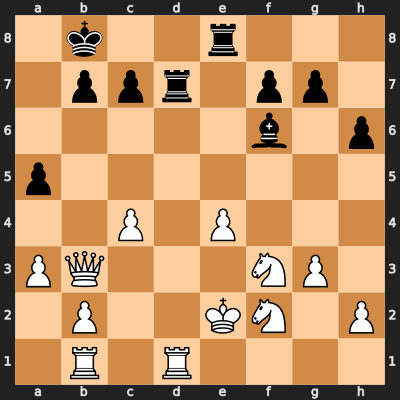

Stockfish (White) move: b3c2


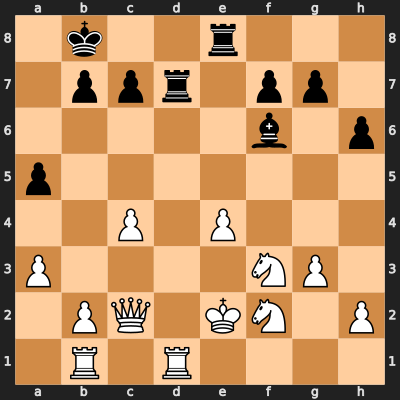

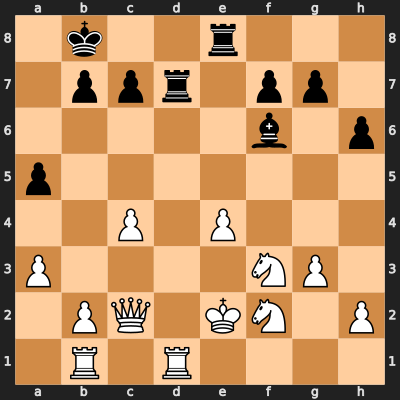

AI (Black) move: d7d8


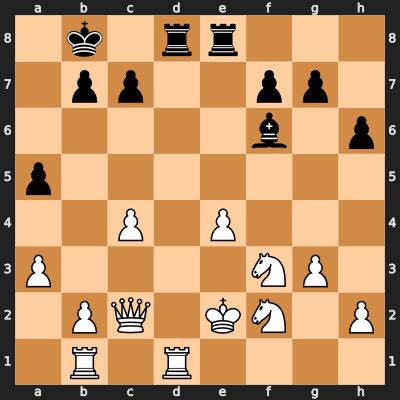

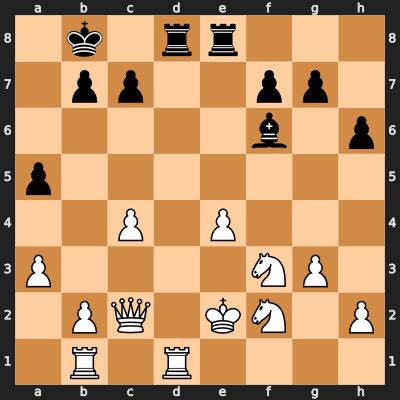

Stockfish (White) move: d1d5


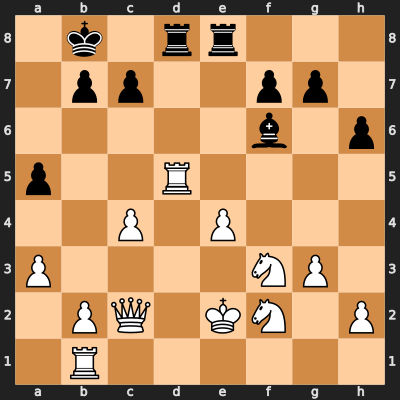

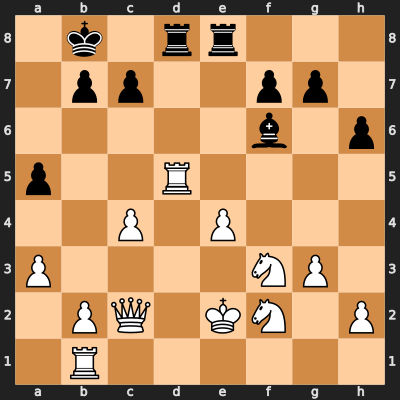

AI (Black) move: h6h5


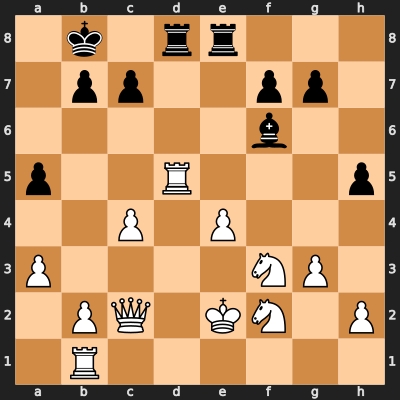

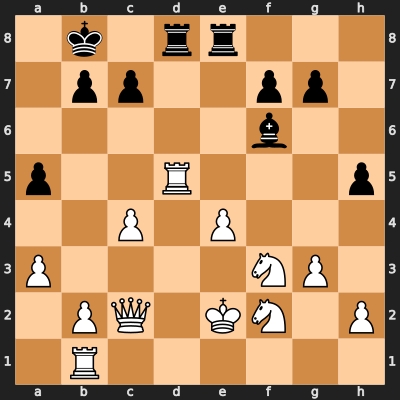

Stockfish (White) move: d5d8


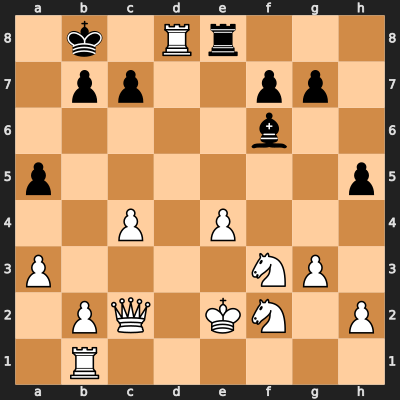

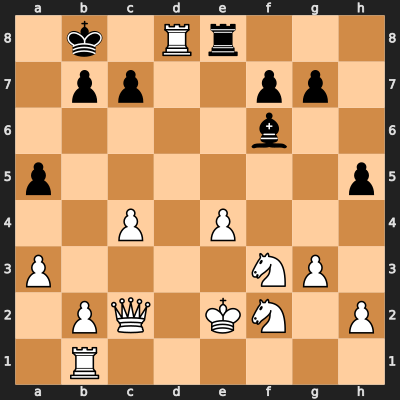

AI (Black) move: e8d8


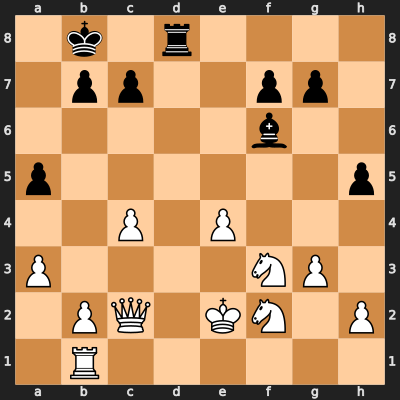

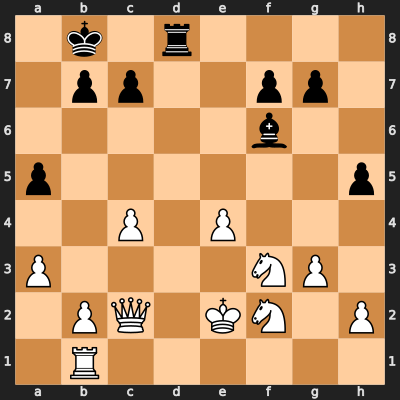

Stockfish (White) move: c2c1


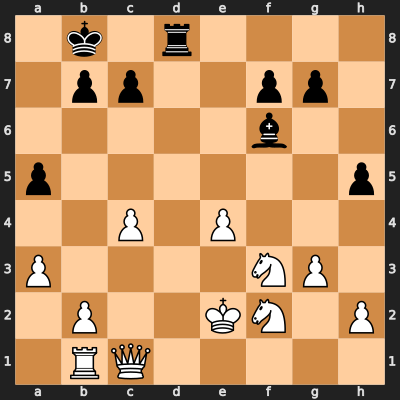

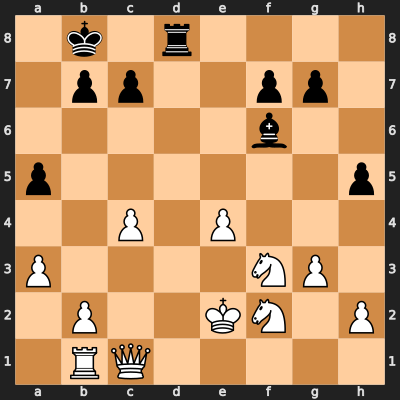

AI (Black) move: b8c8


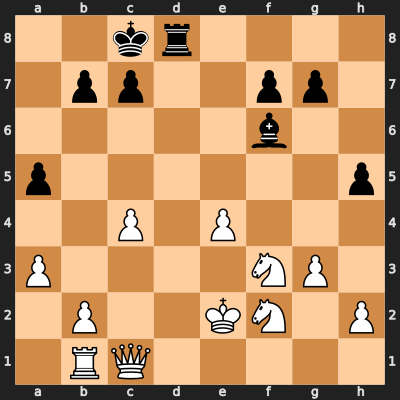

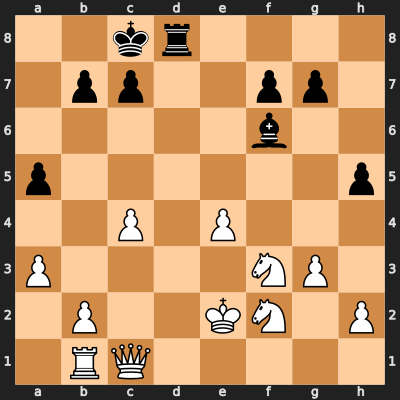

Stockfish (White) move: c4c5


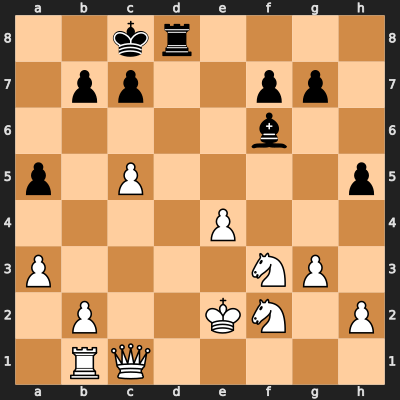

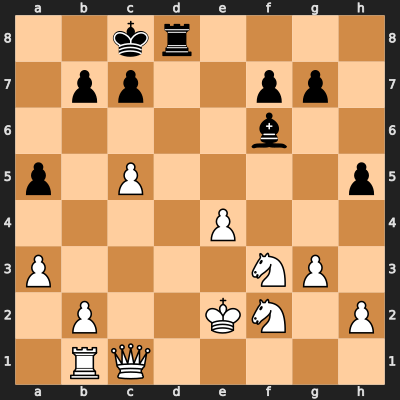

AI (Black) move: h5h4


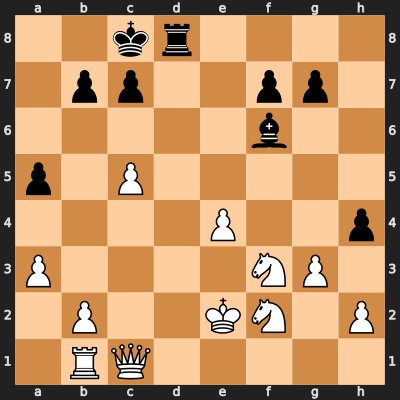

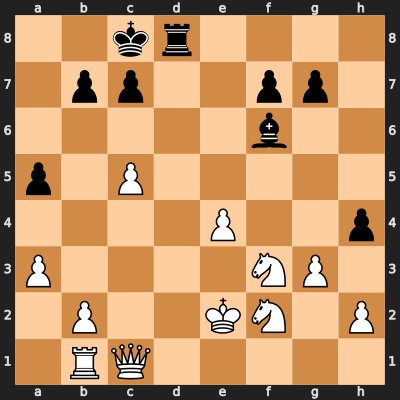

Stockfish (White) move: g3g4


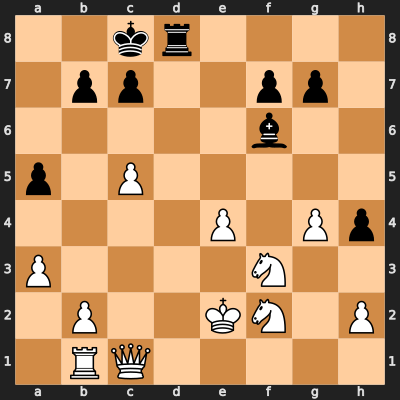

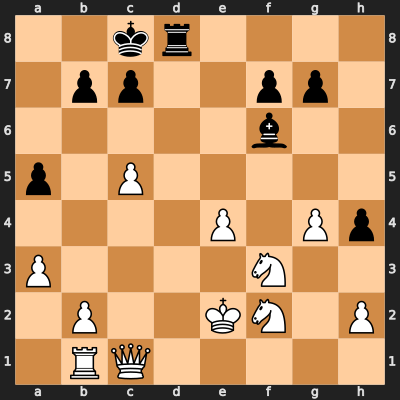

AI (Black) move: d8h8


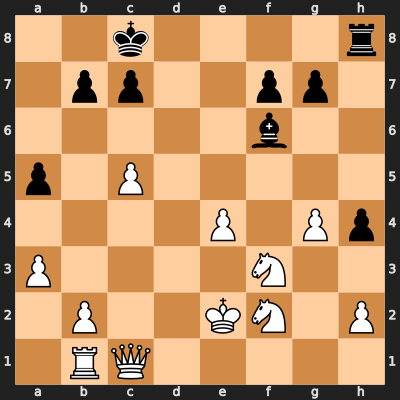

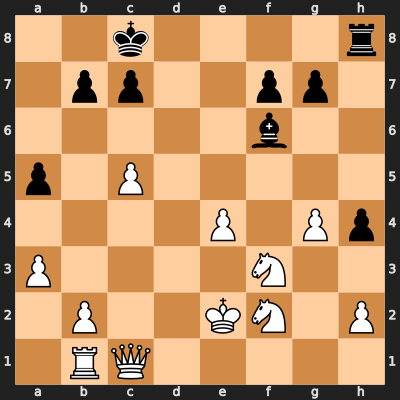

Stockfish (White) move: c1c4


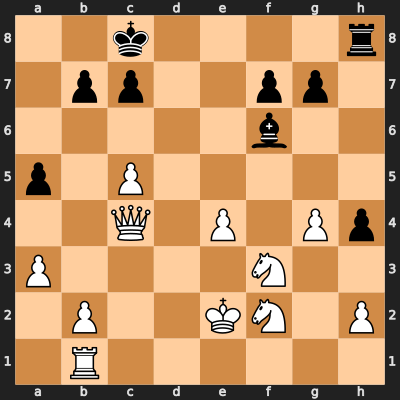

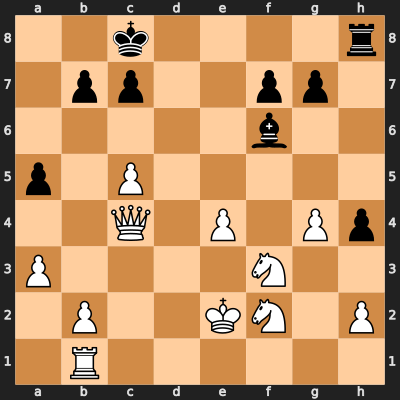

AI (Black) move: h8d8


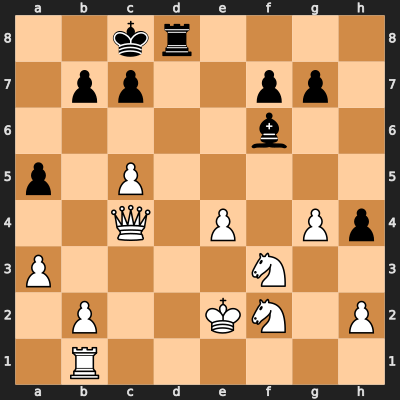

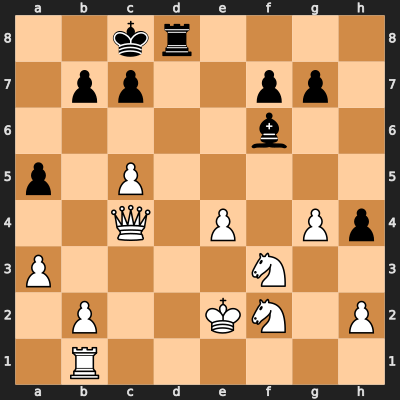

Stockfish (White) move: c5c6


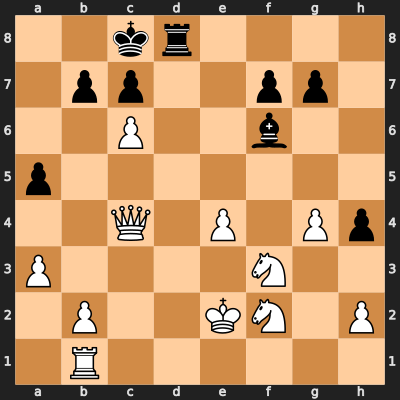

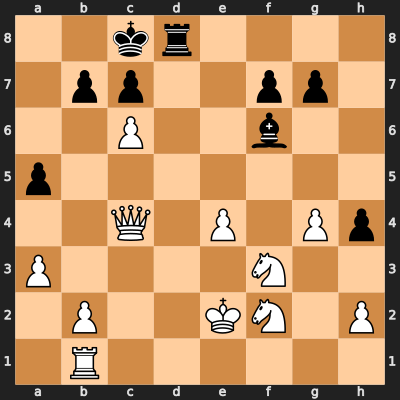

AI (Black) move: h4h3


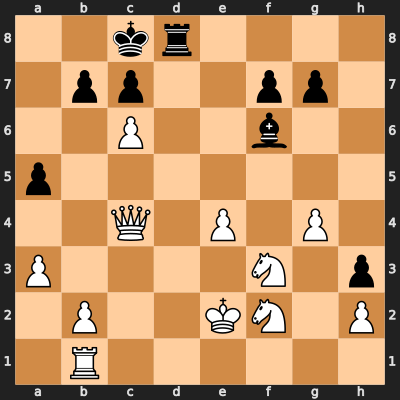

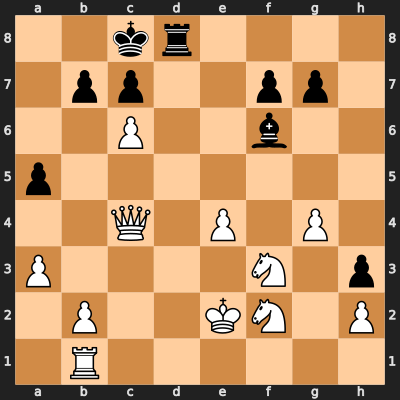

Stockfish (White) move: e4e5


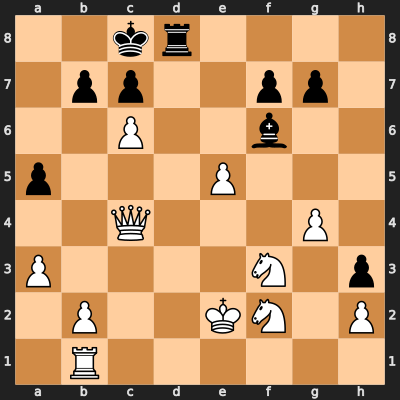

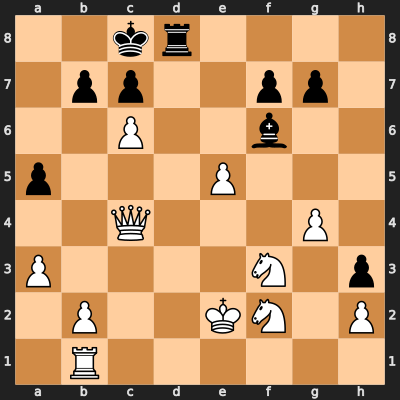

AI (Black) move: a5a4


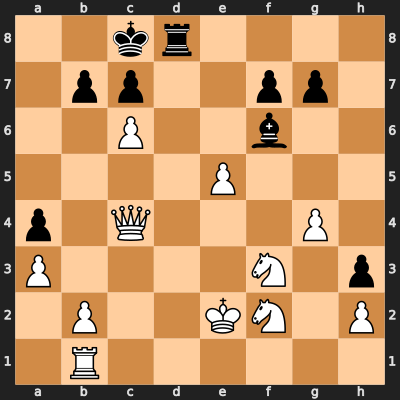

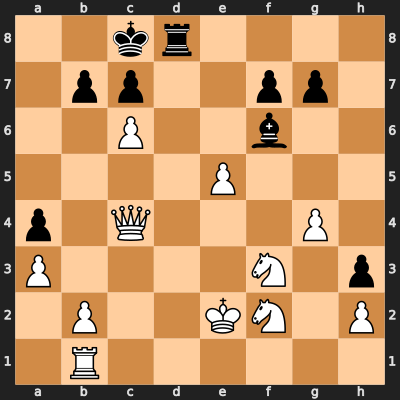

Stockfish (White) move: c4a4


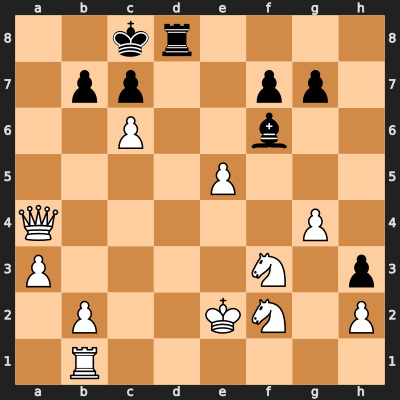

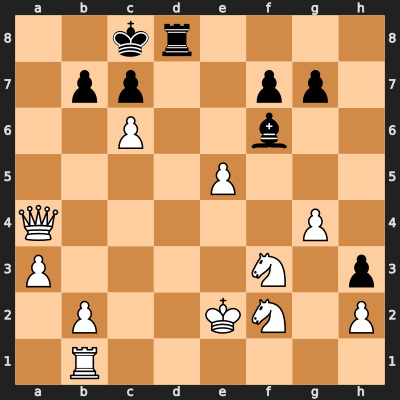

AI (Black) move: d8e8


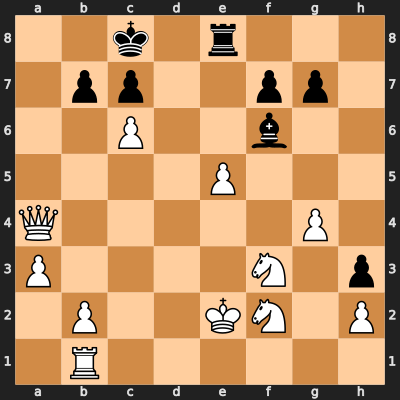

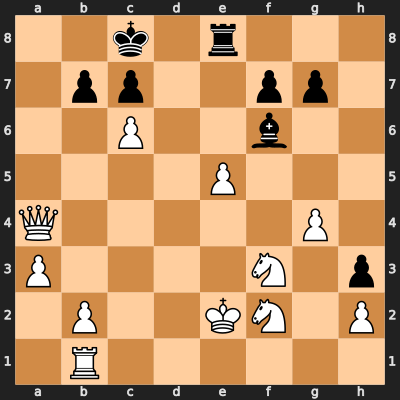

Stockfish (White) move: a4a8


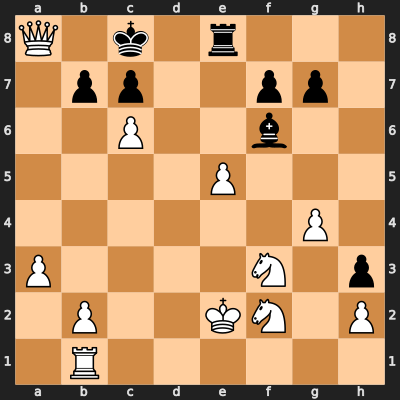

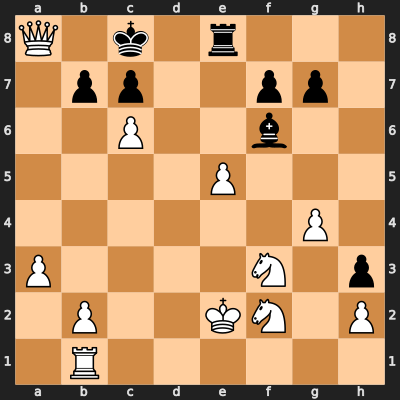

Game over: 1-0


In [55]:
import chess
import chess.engine
from stockfish import Stockfish
from IPython.display import display, SVG
import chess.svg

def display_board(board, size=300):
    display(SVG(chess.svg.board(board=board, size=size)))

stockfish_path = "C:/Users/Lenovo/Downloads/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe"
engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
engine.configure({"UCI_LimitStrength": True, "UCI_Elo": 1320})

board = chess.Board()

def play_game_as_black(ai_function, board_size=300):
    while not board.is_game_over():
        display_board(board, size=board_size)  

        if board.turn == chess.WHITE:
            stockfish_move = engine.play(board, chess.engine.Limit(time=0.1))
            print(f'Stockfish (White) move: {stockfish_move.move}')
            board.push(stockfish_move.move)
        else:
            ai_move = ai_function(board.fen(), player='b')  
            print(f'AI (Black) move: {ai_move}')
            board.push_san(ai_move)
        
        display_board(board, size=board_size)  

    display_board(board, size=board_size) 
    print("Game over:", board.result())

play_game_as_black(play_nn, board_size=400)  

engine.quit()
